# Analisis Data Kesehatan - Klasifikasi TEMPLATE

## Unit 1: J.62DMI00.004.1 - Mengumpulkan Data

sumber data: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1



<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">



### load google drive

In [1]:
# Define the variable
folder_name = "/content/drive/My Drive/Colab Notebooks"

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
# column_names = ['ID', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY', 'STATUS']
df =pd.read_csv(f'{folder_name}/cirrhosis.csv', sep=',', skipinitialspace=True, na_values="?")

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(5)

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

### informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### informasi missing value

In [6]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [7]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64


## Unit 2: J.62DMI00.005.1 - Menelaah Data

### analisis deskriptif

In [8]:
df.describe()

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   41.250000    871.500000   80.600000      84.250000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  407.000000   416.000000  412.000000  
mean   257.024570    10.731731    3.024272  
std     98.325585     1.022000    0.882042  
min     62.000000     9.000000    1.000000  
25%    188.500000    10.000000    2.000000  
50%    251.000000    10.600000    3.000000  
75%    318.000000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

In [9]:
# Statistik deskriptif untuk variabel kategorikal
df.describe(include=['object'])

Status             Drug  Sex Ascites Hepatomegaly Spiders Edema
count     418              312  418     312          312     312   418
unique      3                2    2       2            2       2     3
top         C  D-penicillamine    F       N            Y       N     N
freq      232              158  374     288          160     222   354

### distribusi target variable

In [10]:
# Distribusi target variable
df['Status'].value_counts(normalize=True)

Status
C     0.555024
D     0.385167
CL    0.059809
Name: proportion, dtype: float64

### visualisasi distribusi awal

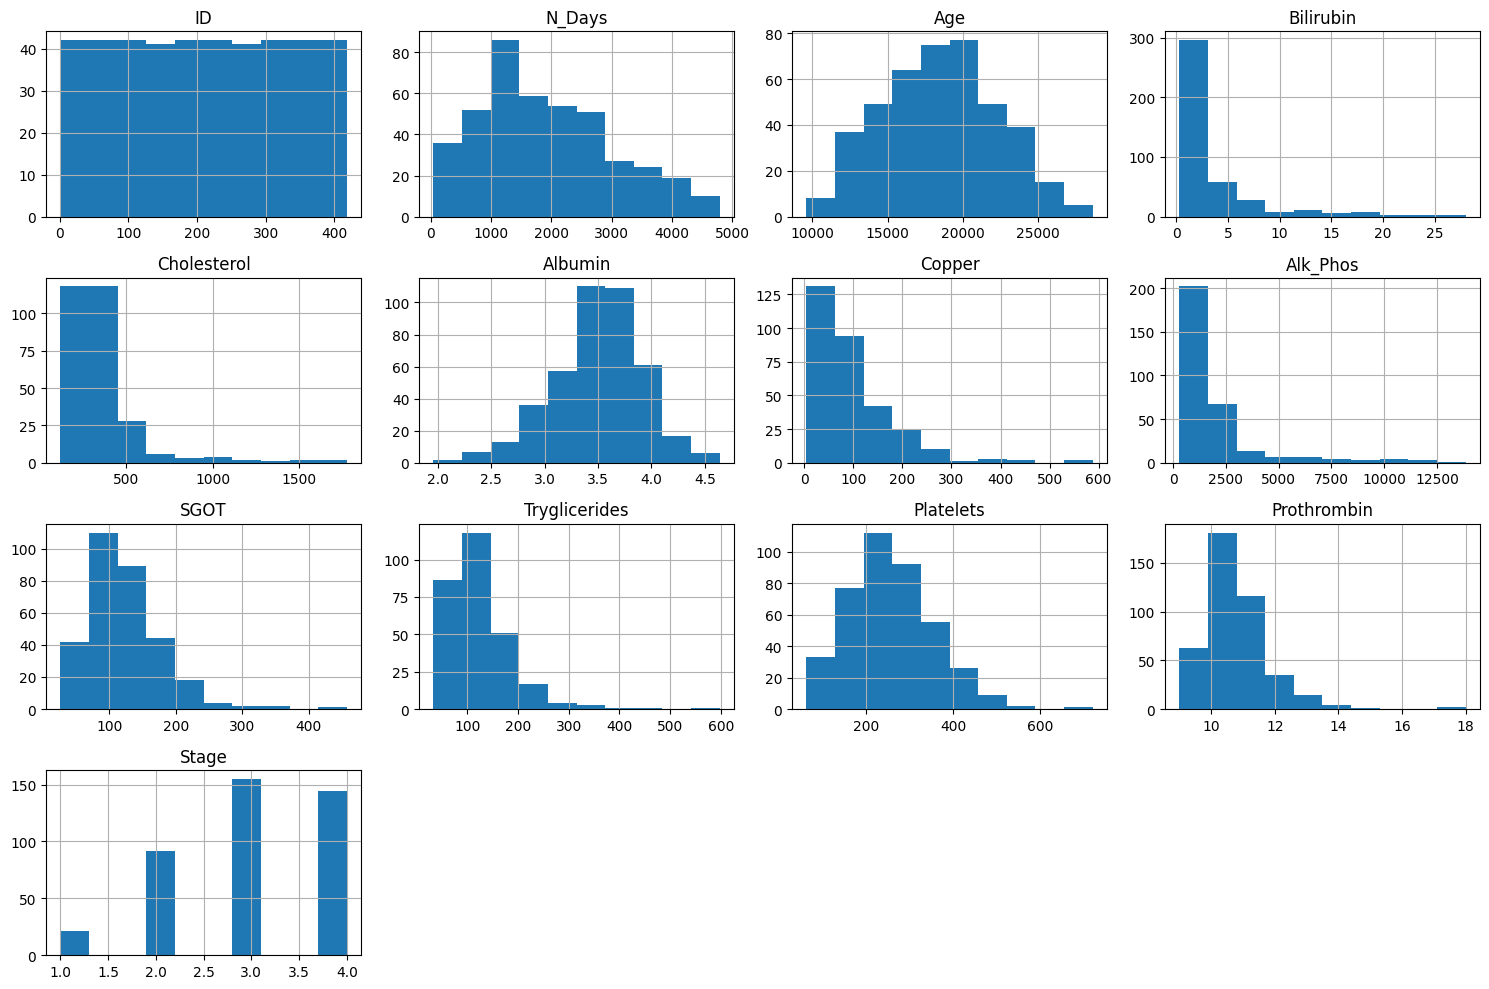

In [11]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

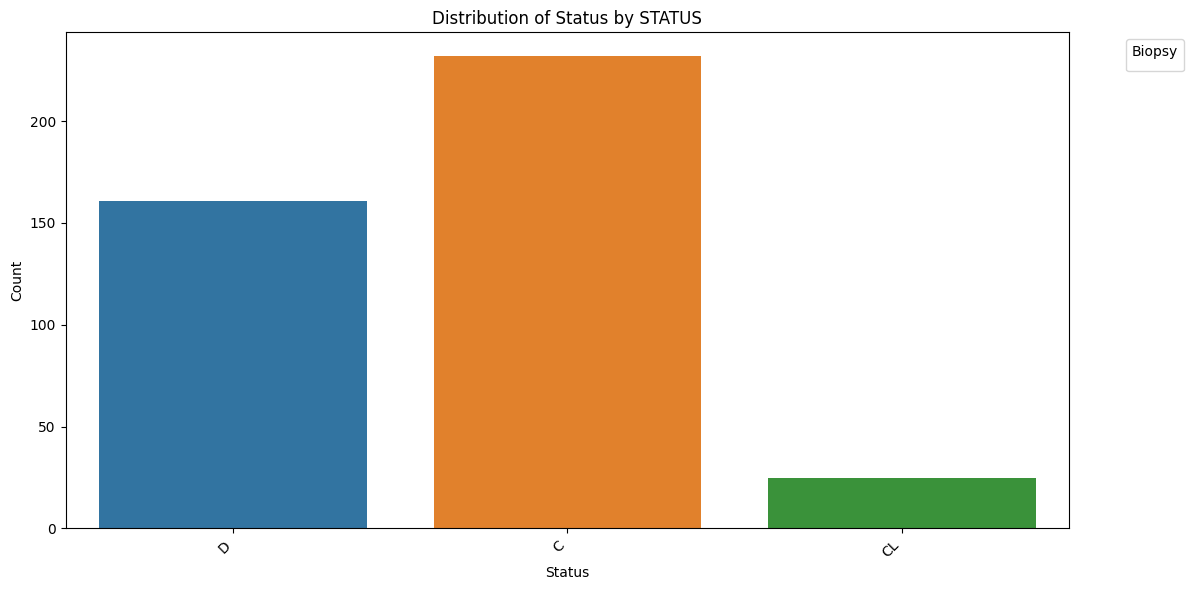

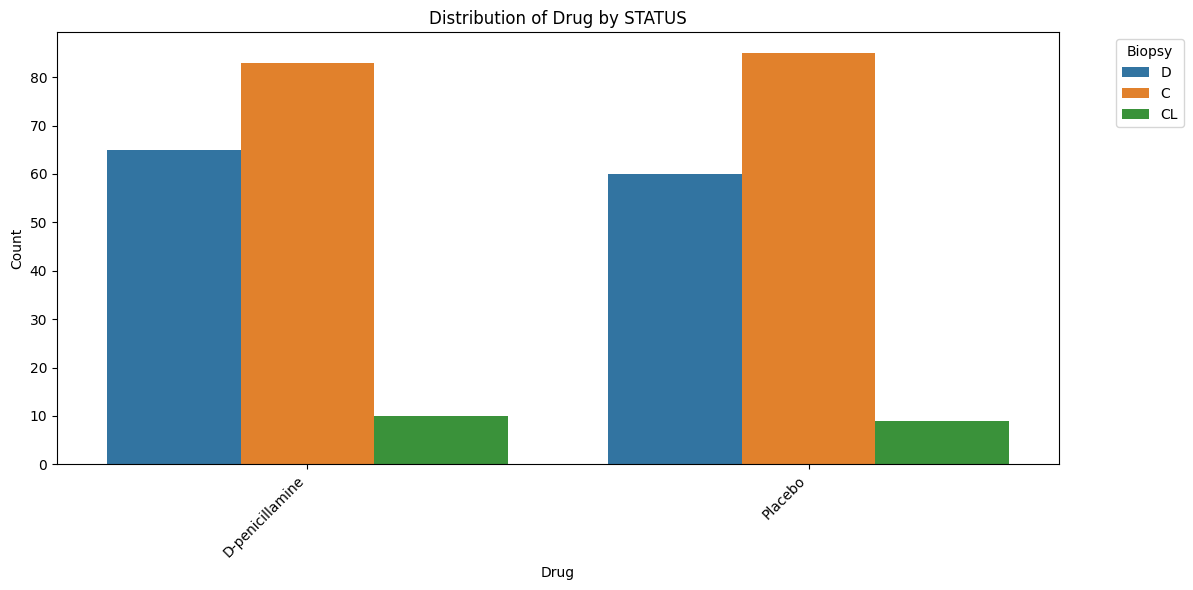

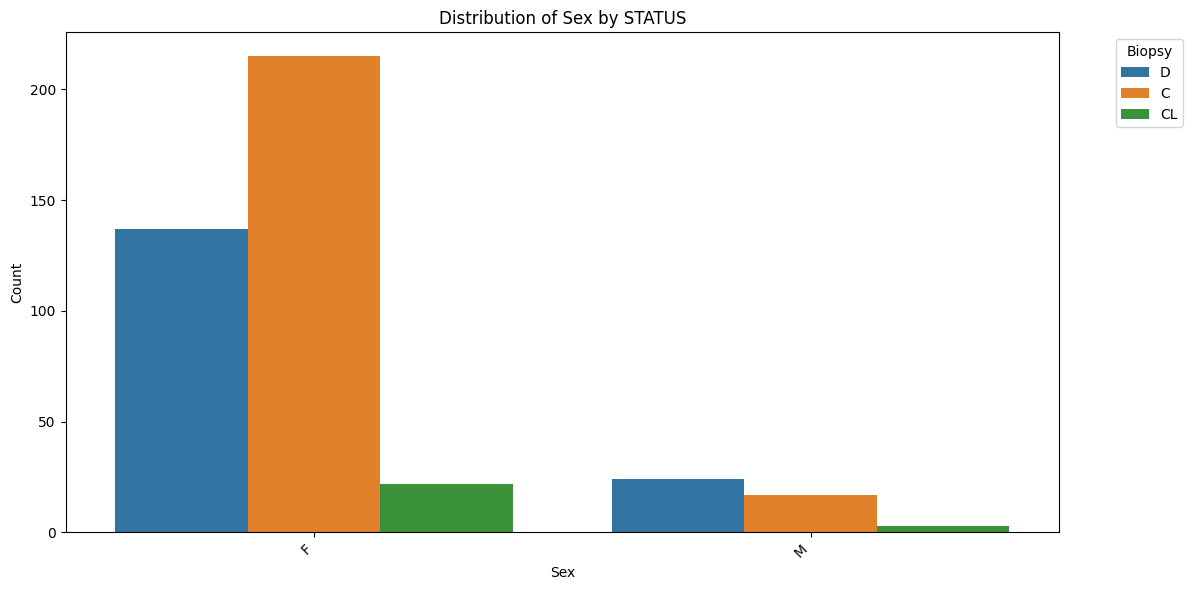

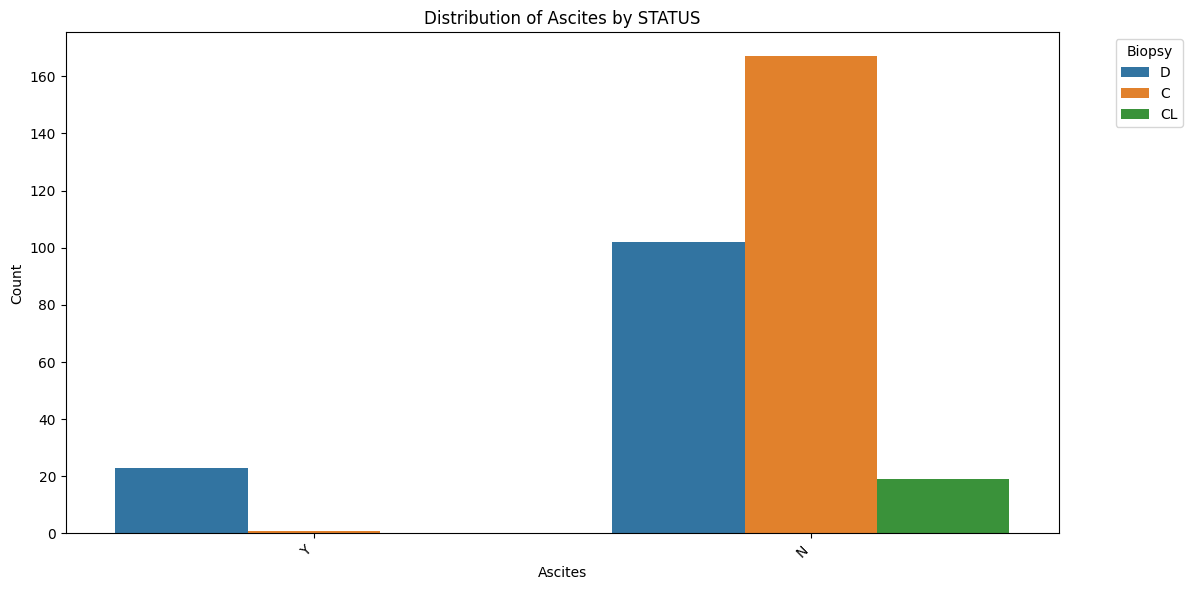

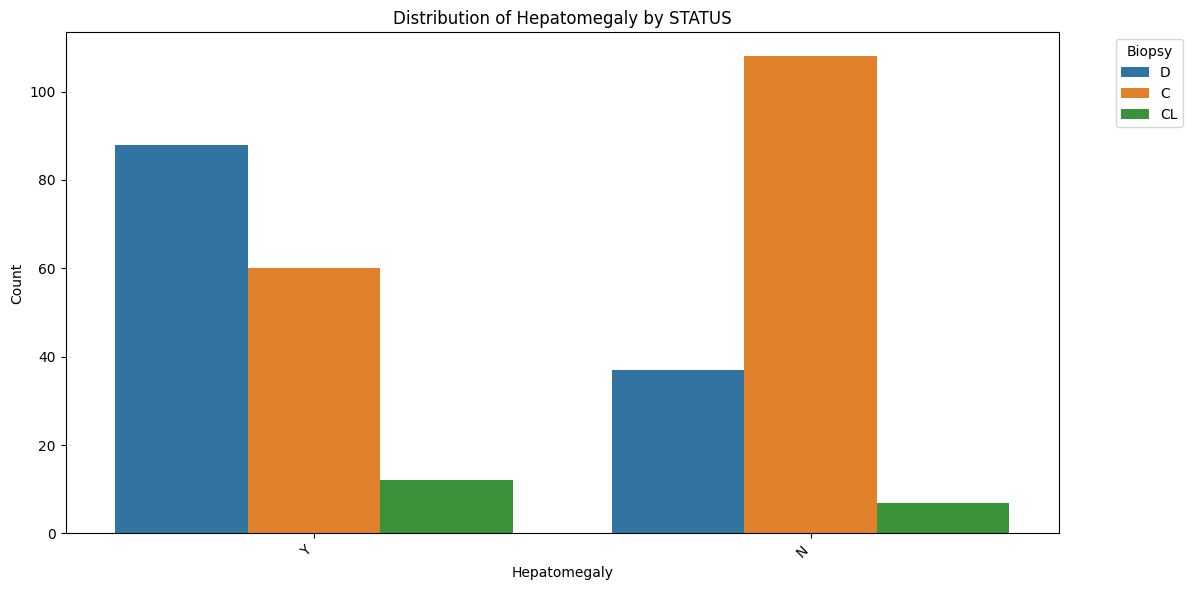

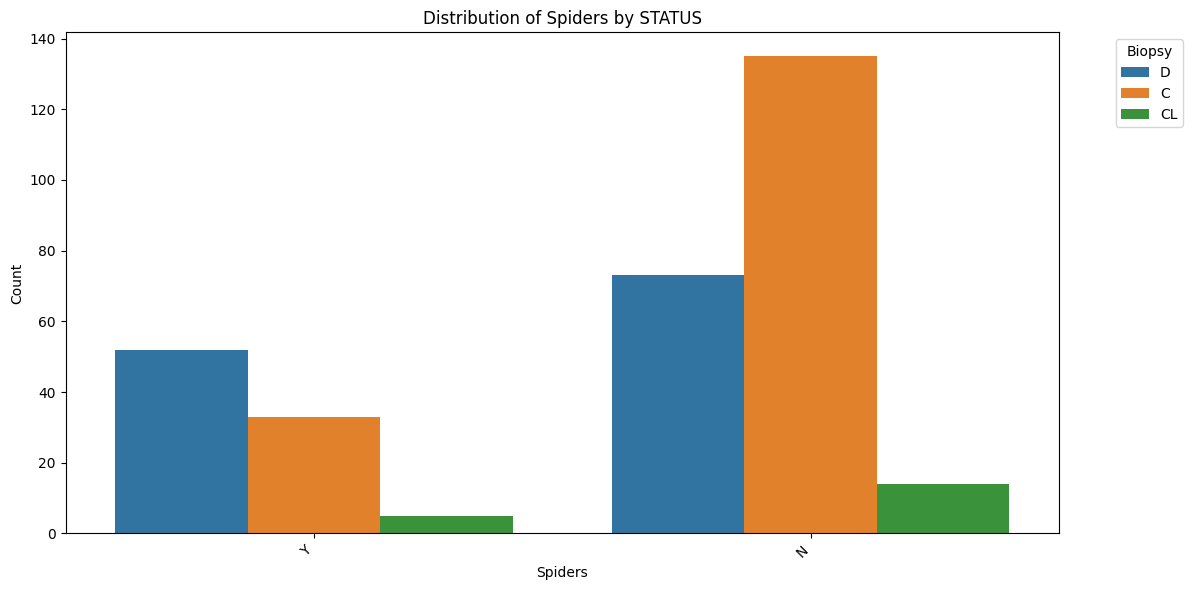

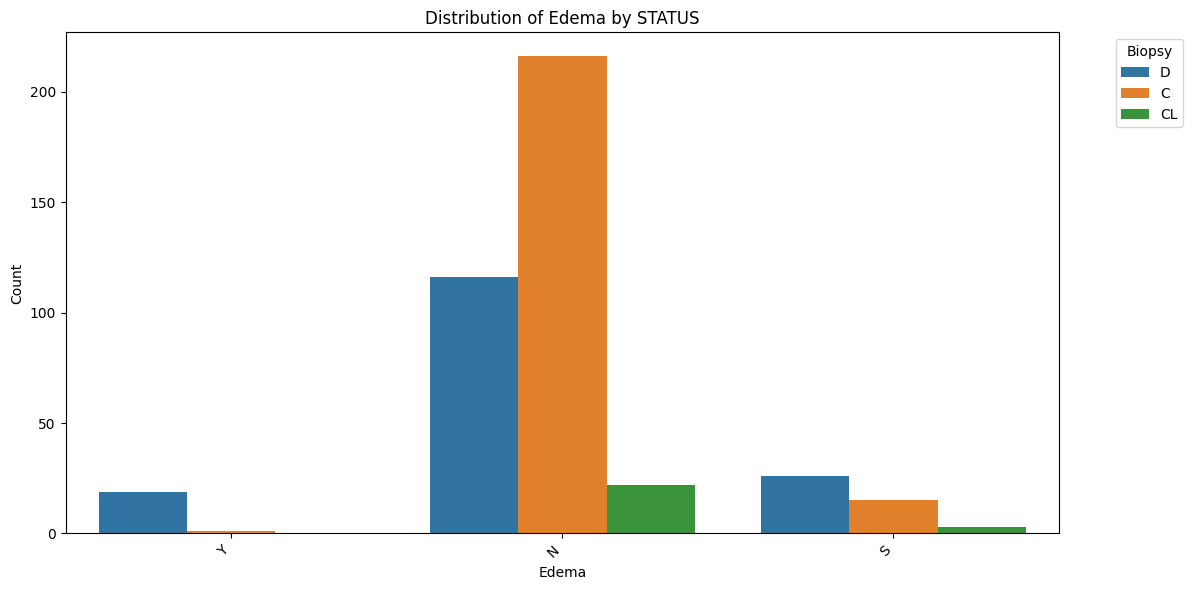

In [12]:
# Countplot untuk variabel kategorikal dengan hue=income
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'STATUS':  # Hindari membuat plot untuk kolom classification itu sendiri
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=feature, hue='Status')
        plt.title(f'Distribution of {feature} by STATUS')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Biopsy', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

### analisis korelasi

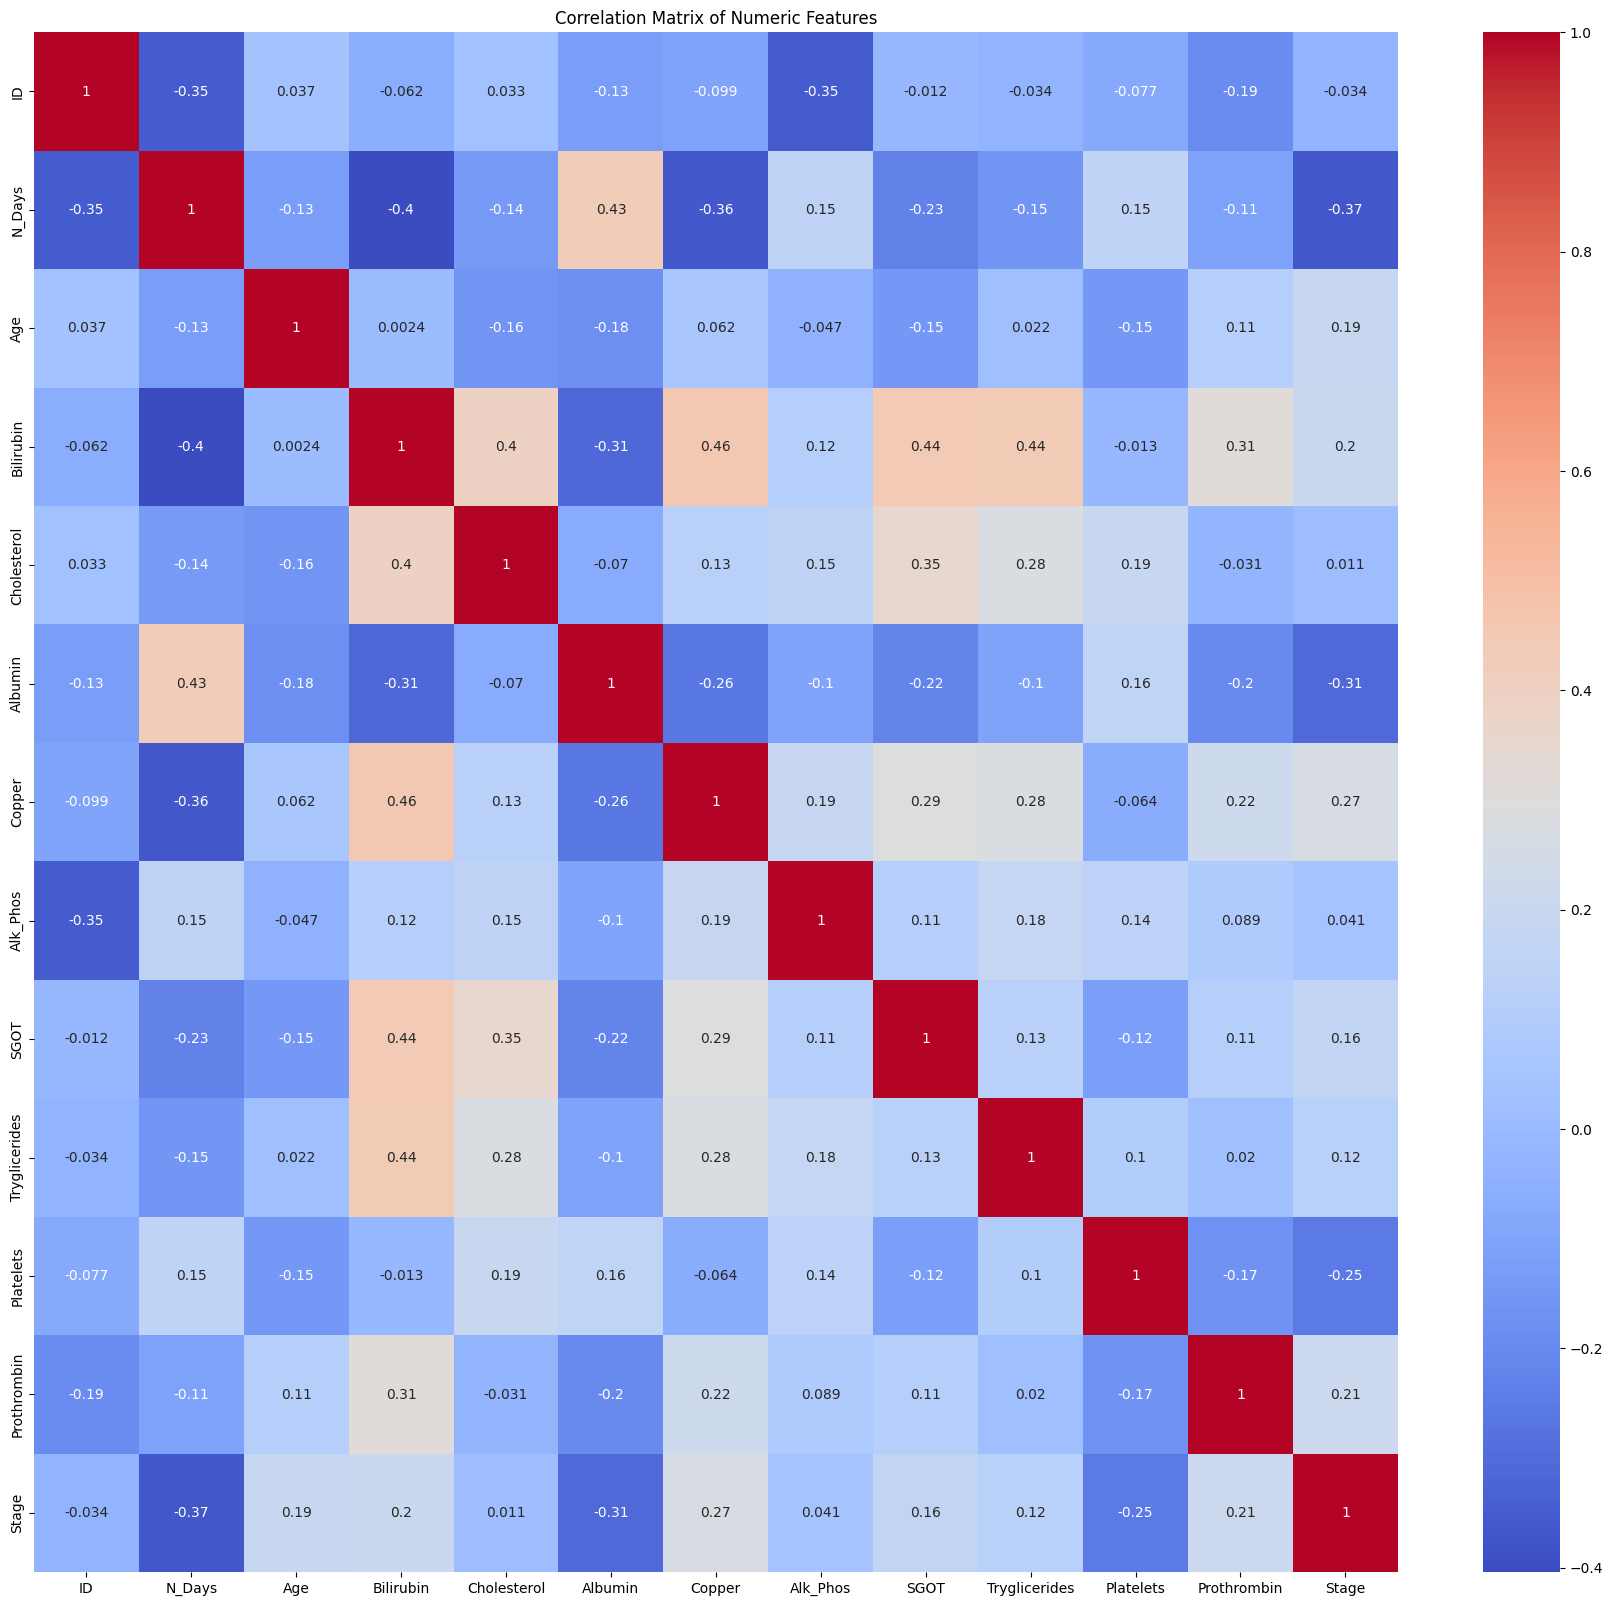

In [13]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [14]:
print(df.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


### analisis hubungan dengan target variable

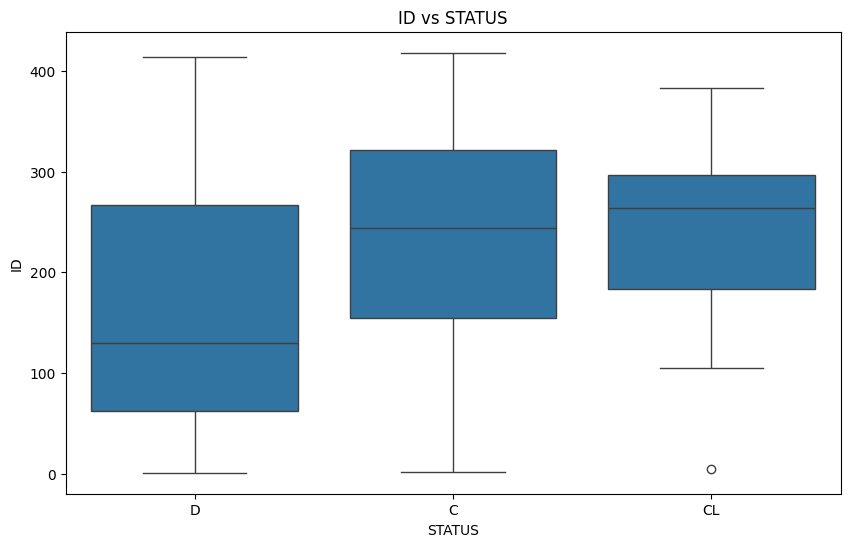

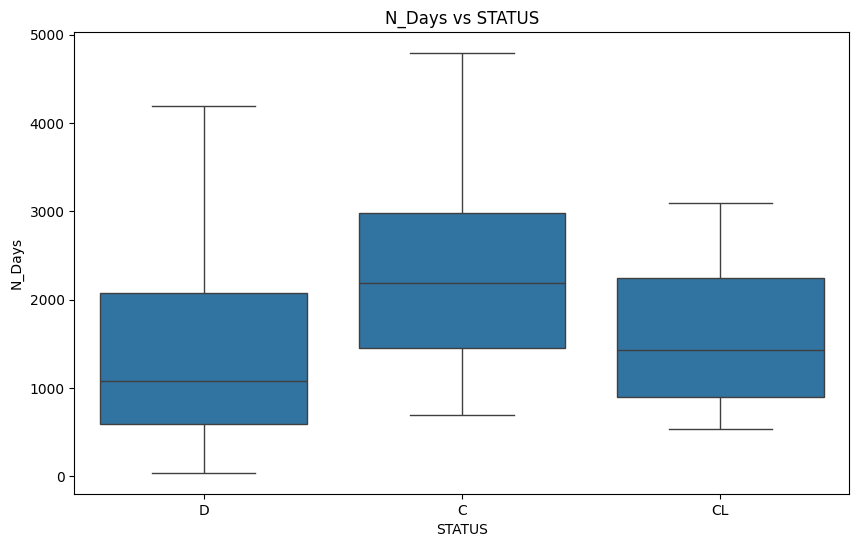

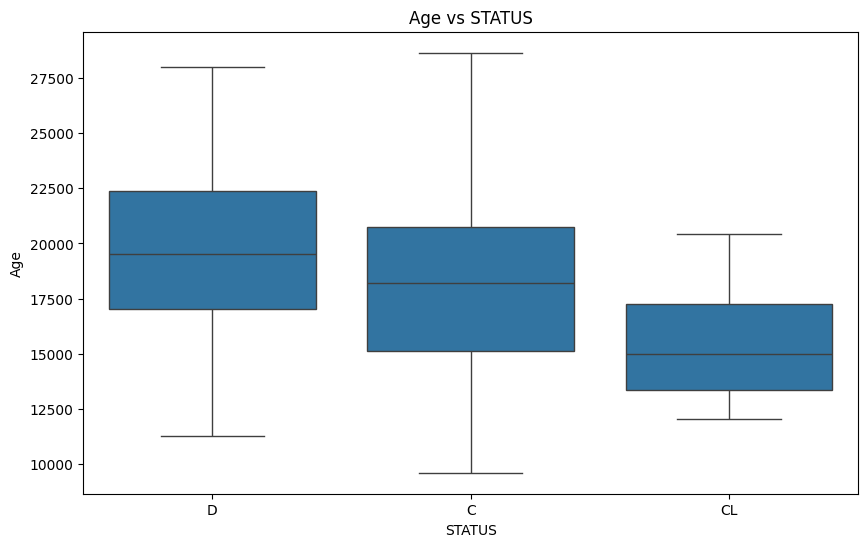

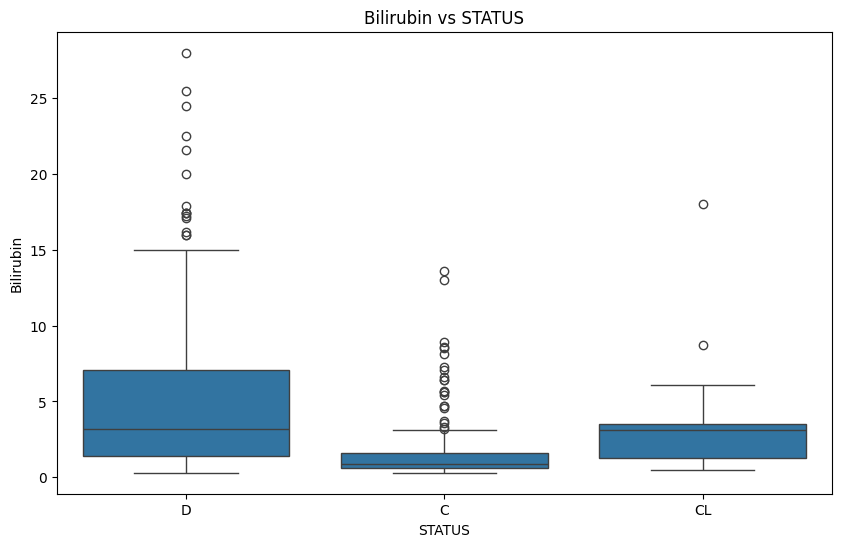

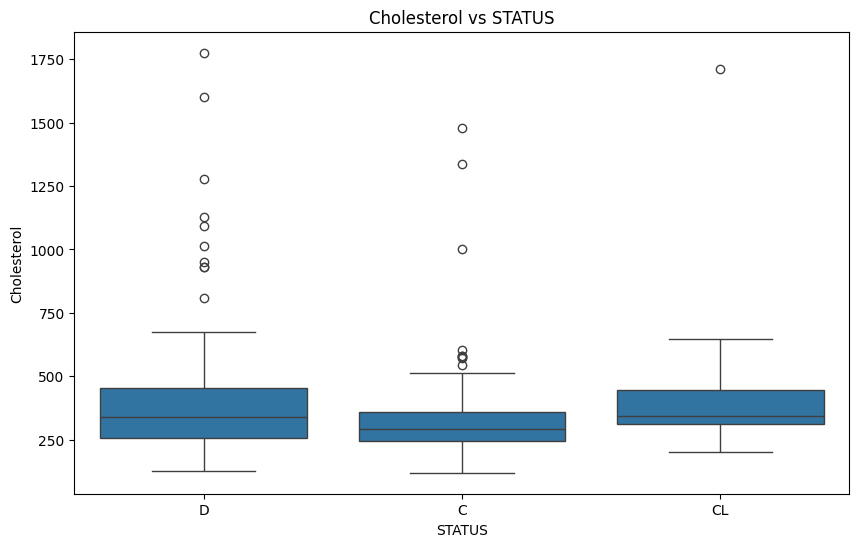

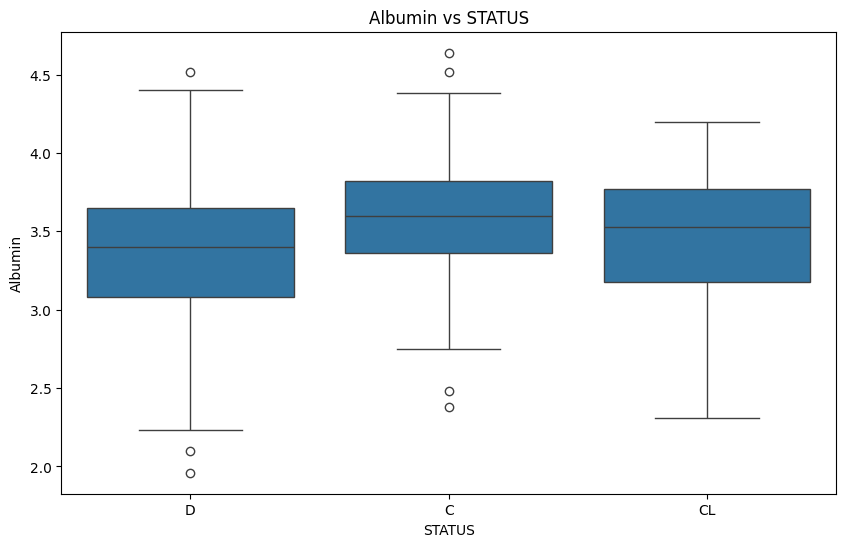

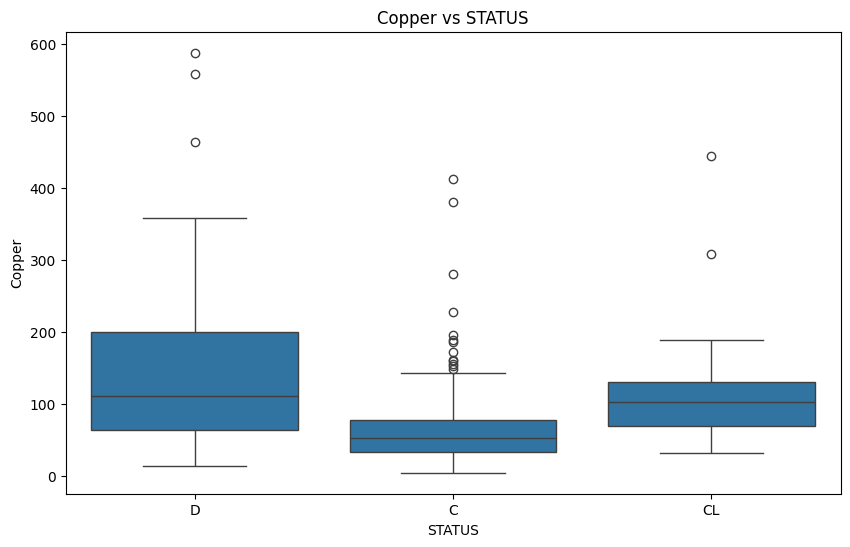

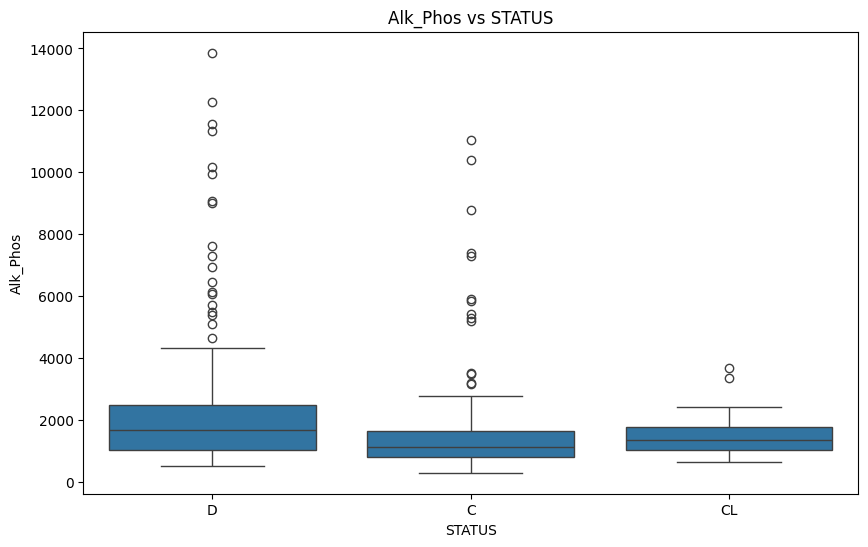

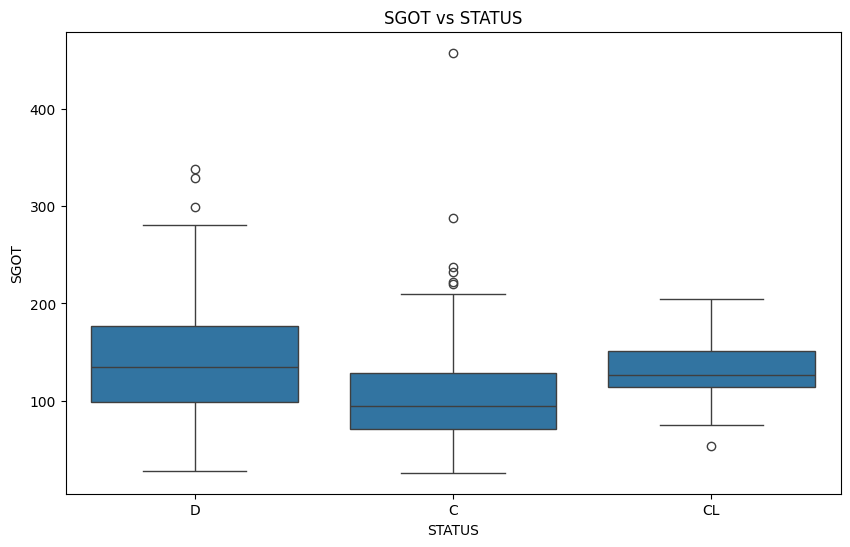

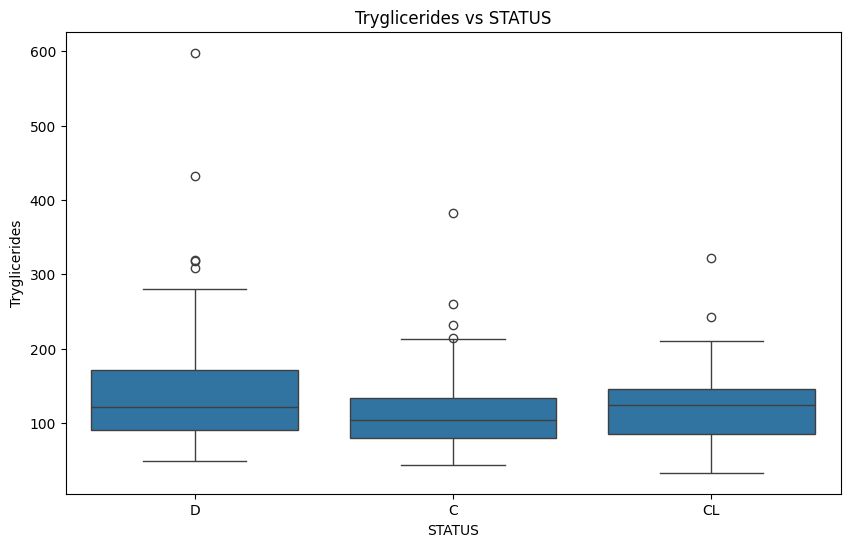

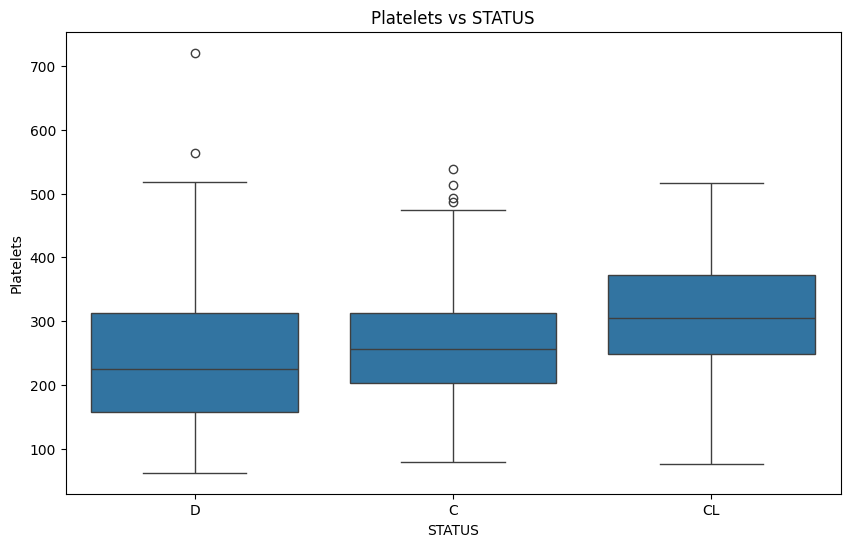

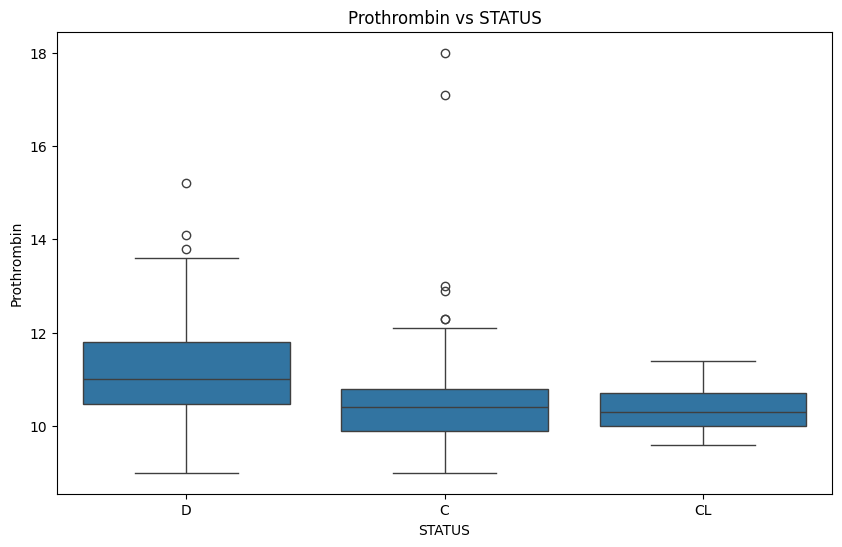

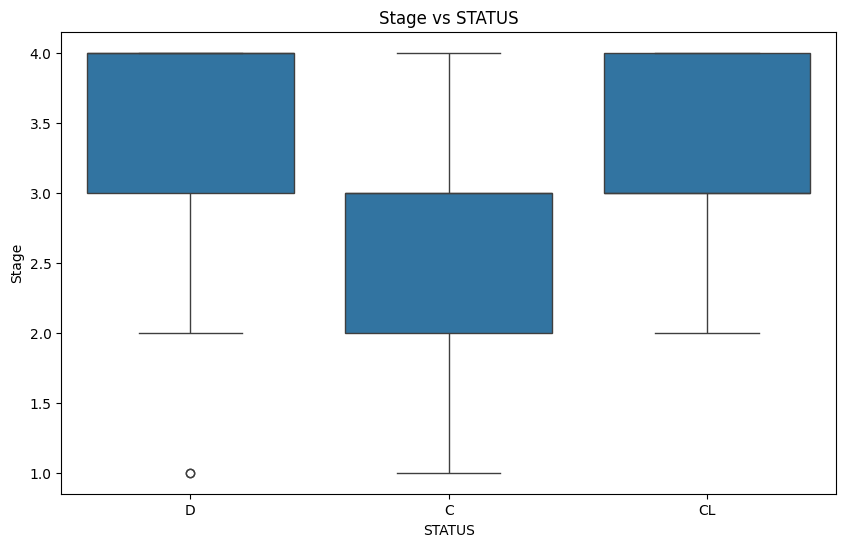

In [15]:
# Mendapatkan fitur numerik dari dataset
numeric_features = df.select_dtypes(include=[np.number]).columns

# Membuat boxplot untuk setiap fitur numerik berdasarkan target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'{feature} vs STATUS')
    plt.xlabel('STATUS')
    plt.ylabel(feature)
    plt.show()


### identifikasi outlier

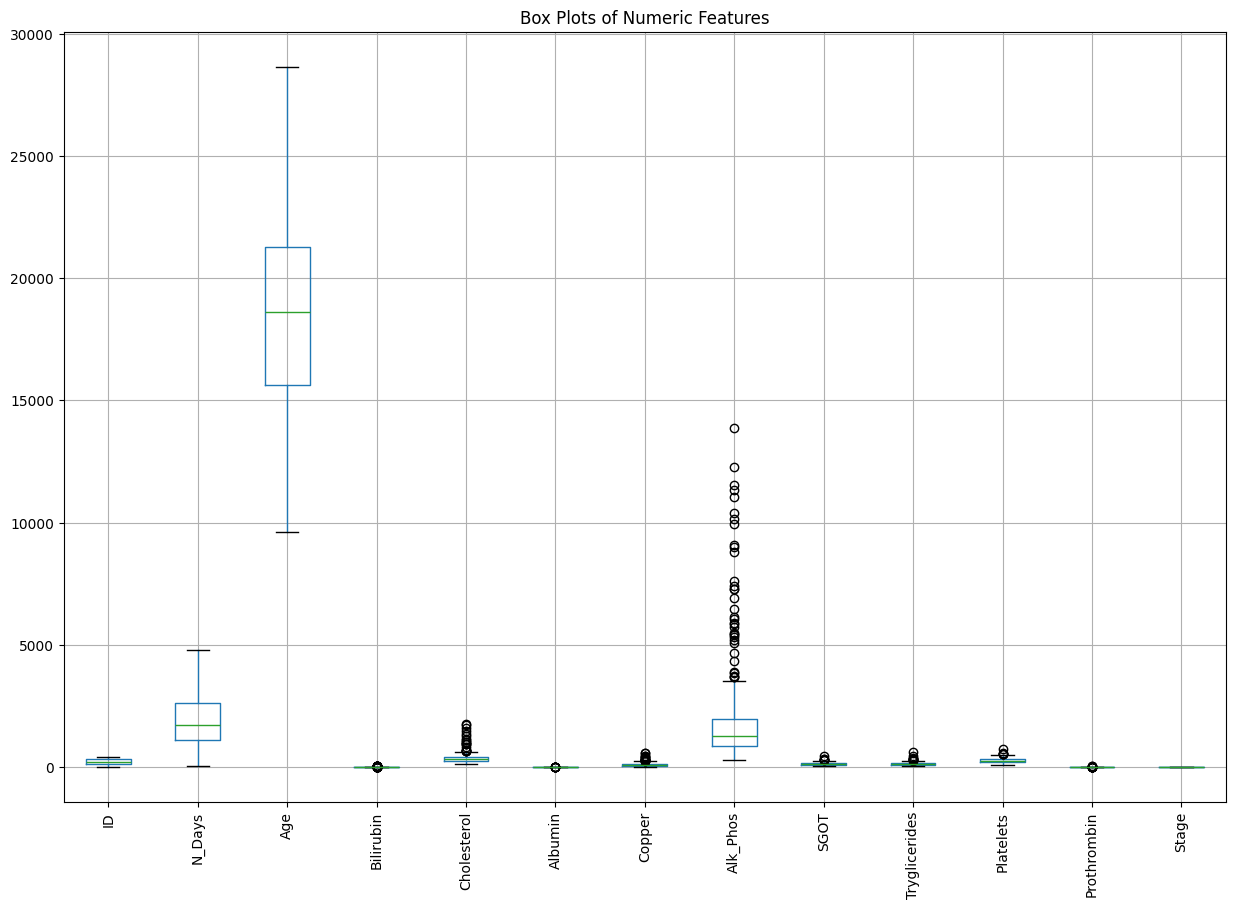

In [16]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

## Unit 3: J.62DMI00.006.1 - Memvalidasi Data

### periksa missing value

In [17]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

               Total    Percent
ID                 0   0.000000
N_Days             0   0.000000
Status             0   0.000000
Drug             106  25.358852
Age                0   0.000000
Sex                0   0.000000
Ascites          106  25.358852
Hepatomegaly     106  25.358852
Spiders          106  25.358852
Edema              0   0.000000
Bilirubin          0   0.000000
Cholesterol      134  32.057416
Albumin            0   0.000000
Copper           108  25.837321
Alk_Phos         106  25.358852
SGOT             106  25.358852
Tryglicerides    136  32.535885
Platelets         11   2.631579
Prothrombin        2   0.478469
Stage              6   1.435407


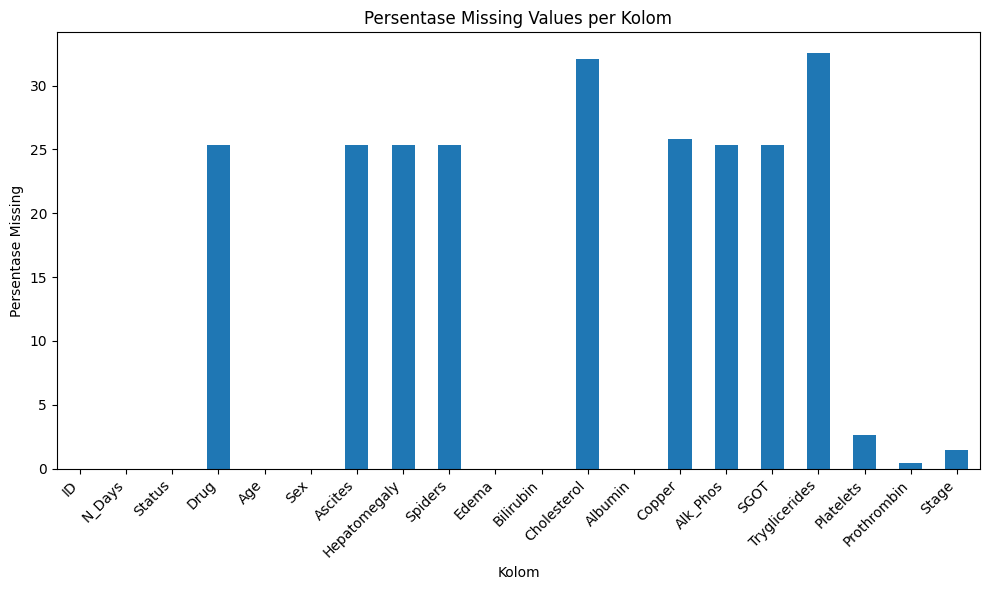

In [18]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### periksa duplikat

In [19]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


### validasi tipe data

In [20]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Nilai non-numerik dalam kolom Cholesterol:
[nan]

Nilai non-numerik dalam kolom Copper:
[nan]

Nilai non-numerik dalam kolom Alk_Phos:
[nan]

Nilai non-numerik dalam kolom SGOT:
[nan]

Nilai non-numerik dalam kolom Tryglicerides:
[nan]

Nilai non-numerik dalam kolom Platelets:
[nan]

Nilai non-numerik dalam kolom Prothrombin:
[nan]

Nilai non-numerik dalam kolom Stage:
[nan]


### validasi nilai range

In [21]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk ID:
Min: 1, Max: 418

Range nilai untuk N_Days:
Min: 41, Max: 4795

Range nilai untuk Age:
Min: 9598, Max: 28650

Range nilai untuk Bilirubin:
Min: 0.3, Max: 28.0

Range nilai untuk Cholesterol:
Min: 120.0, Max: 1775.0

Range nilai untuk Albumin:
Min: 1.96, Max: 4.64

Range nilai untuk Copper:
Min: 4.0, Max: 588.0

Range nilai untuk Alk_Phos:
Min: 289.0, Max: 13862.4

Range nilai untuk SGOT:
Min: 26.35, Max: 457.25

Range nilai untuk Tryglicerides:
Min: 33.0, Max: 598.0

Range nilai untuk Platelets:
Min: 62.0, Max: 721.0

Range nilai untuk Prothrombin:
Min: 9.0, Max: 18.0

Range nilai untuk Stage:
Min: 1.0, Max: 4.0

Kategori unik dalam Status:
['D' 'C' 'CL']

Kategori unik dalam Drug:
['D-penicillamine' 'Placebo' nan]

Kategori unik dalam Sex:
['F' 'M']

Kategori unik dalam Ascites:
['Y' 'N' nan]

Kategori unik dalam Hepatomegaly:
['Y' 'N' nan]

Kategori unik dalam Spiders:
['Y' 'N' nan]

Kategori unik dalam Edema:
['Y' 'N' 'S']


## Unit 5: J.62DMI00.008.1 - Membersihkan Data

### menangani missing value

In [22]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Missing values setelah pembersihan:
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


<ipython-input-22-aa6978263c5f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-22-aa6978263c5f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

### menangani outlier

In [23]:
# def plot_boxplot(df, column):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

# # Contoh untuk kolom numerik
# numeric_columns = df.select_dtypes(include=[np.number]).columns

# for column in numeric_columns:
#     plot_boxplot(df, column)

#     # Menangani outlier dengan IQR method
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df[column] = np.where(df[column] > upper_bound, upper_bound,
#                           np.where(df[column] < lower_bound, lower_bound, df[column]))

#     print(f"Outliers pada {column} sudah dihandel.")
#     plot_boxplot(df, column)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

### menangani duplikat

In [25]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 418


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [27]:
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [28]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/cirrhosis_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'cirrhosis_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'cirrhosis_cleaned.csv'


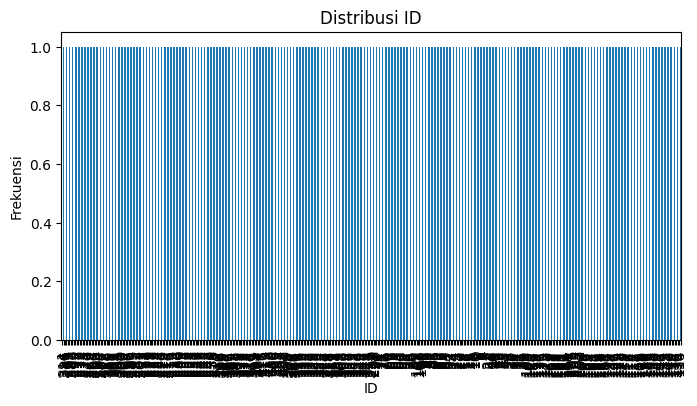

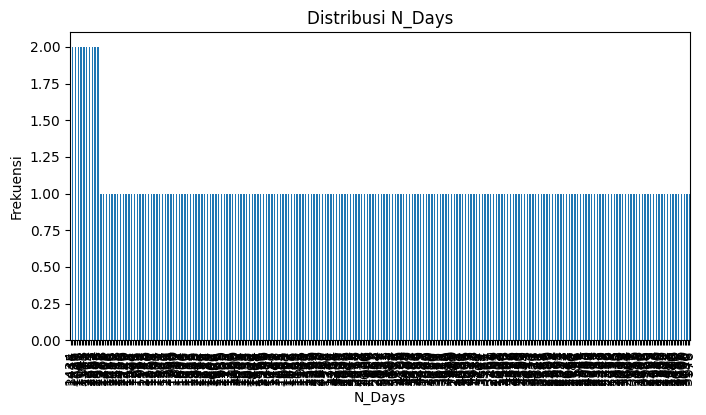

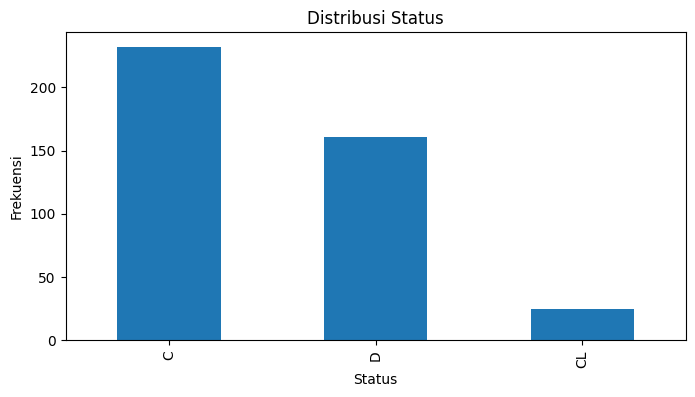

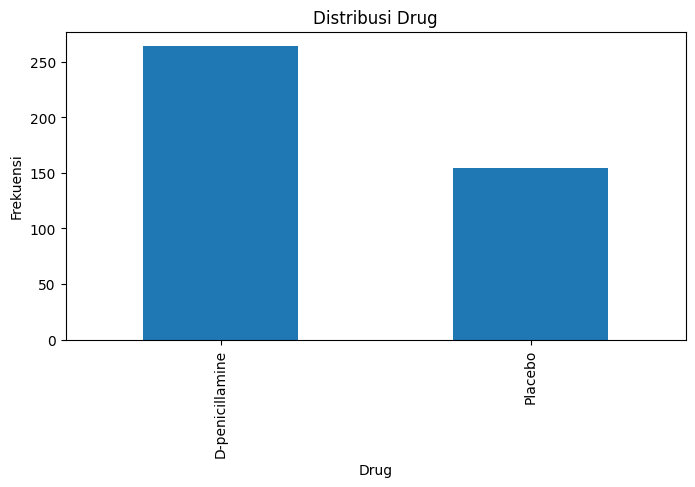

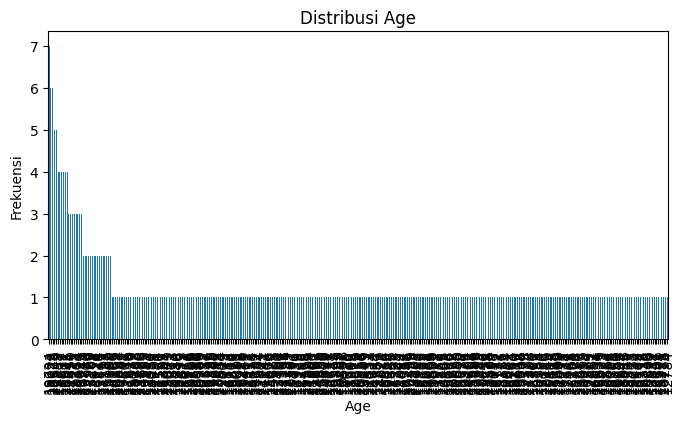

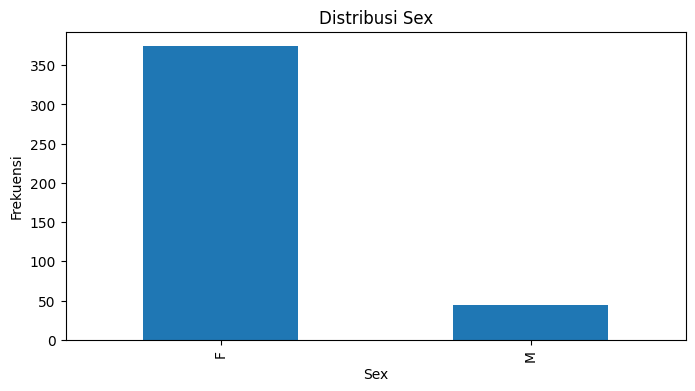

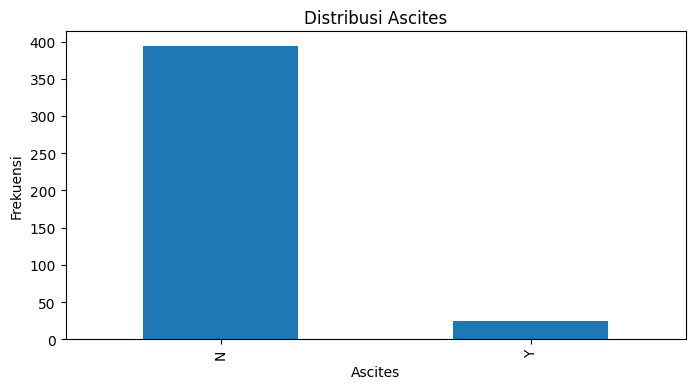

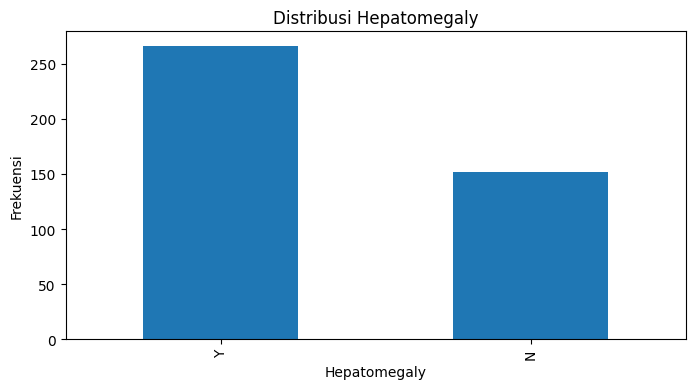

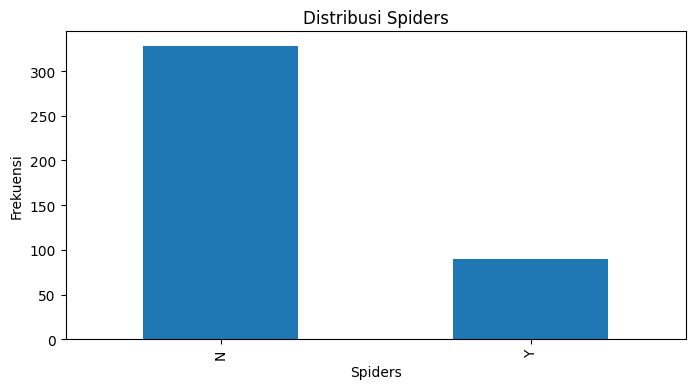

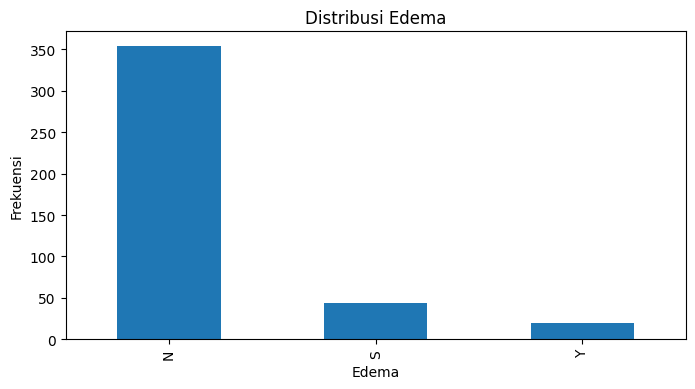

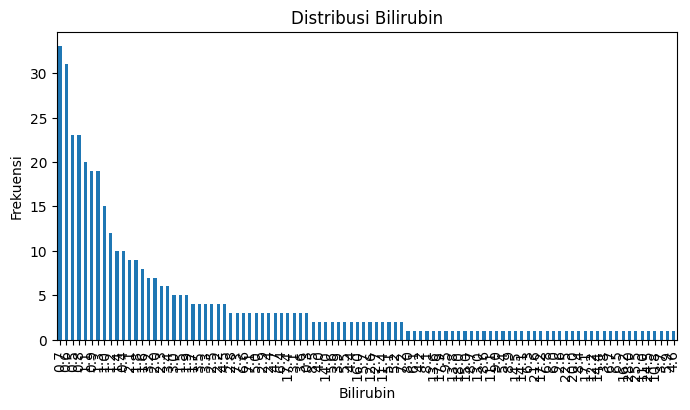

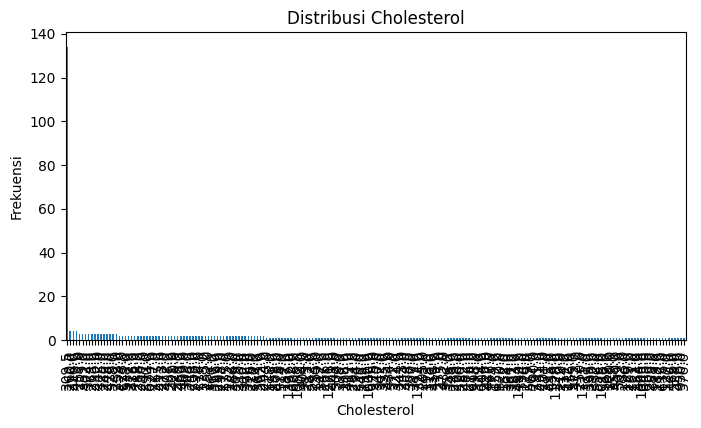

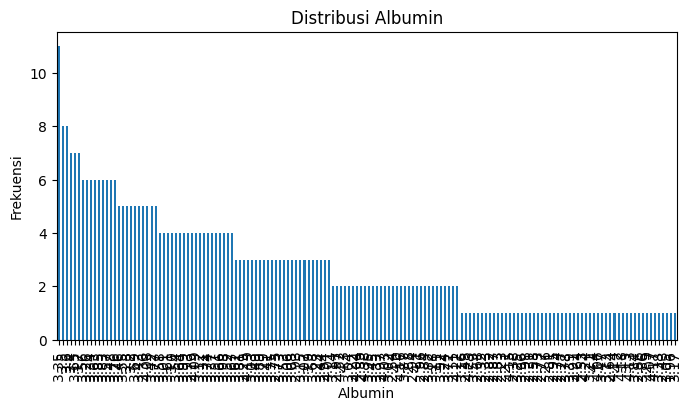

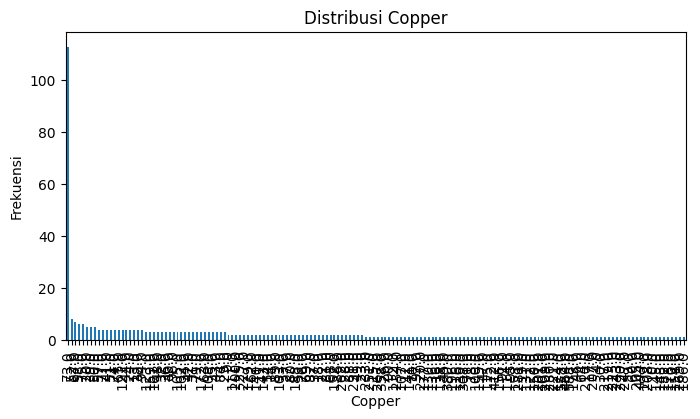

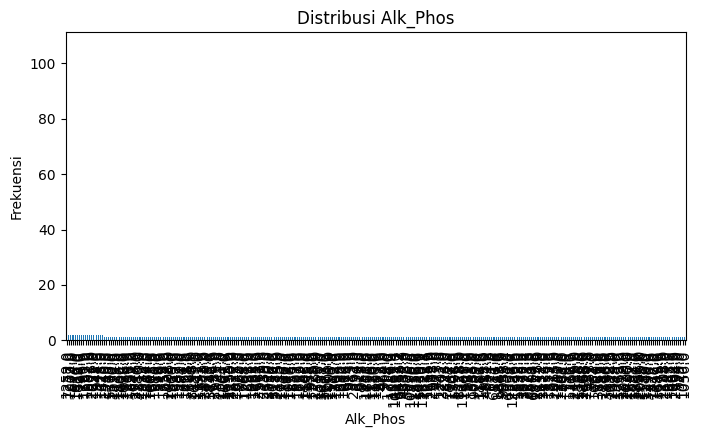

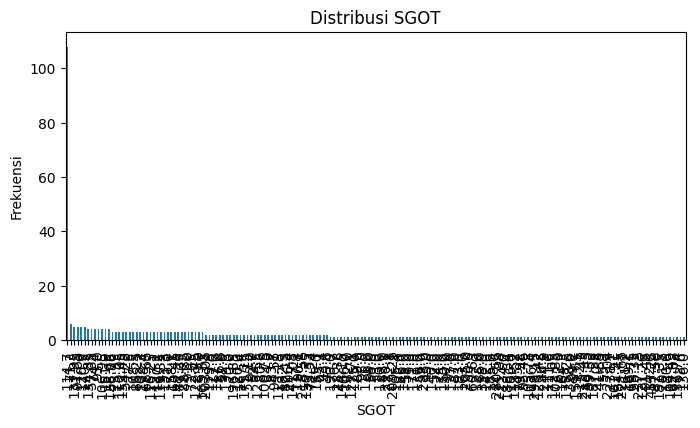

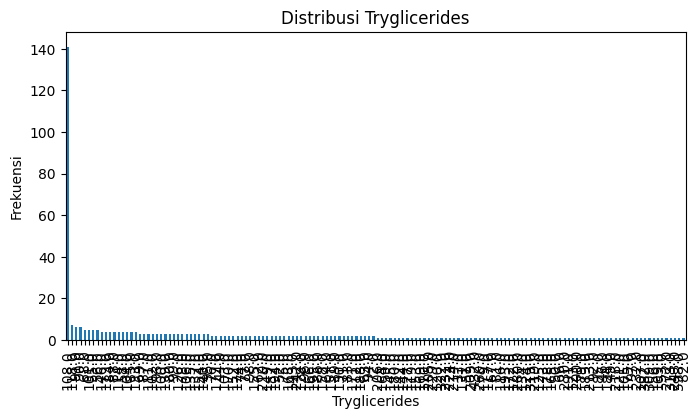

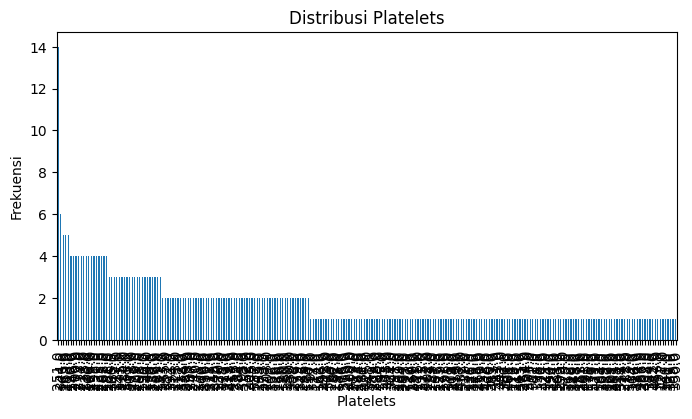

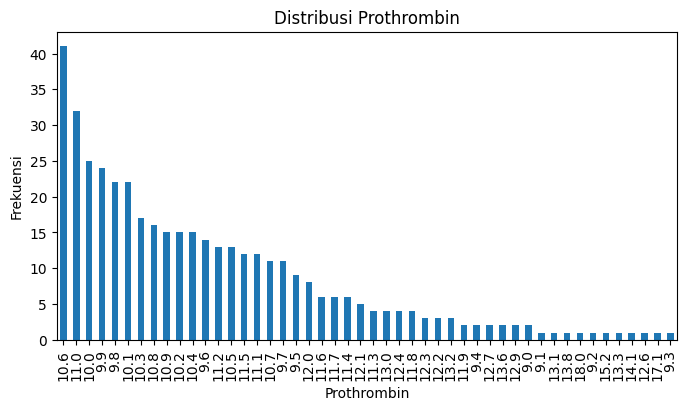

In [29]:
# Visualisasi Fitur dengan Bar Chart
for col in df.columns[:-1]:  # Kecuali kolom target 'STATUS'
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

## Unit 6: J.62DMI00.009.1 - Mengkonstruksi Data

### transformasi data kategorical

In [30]:
# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Kategori unik dalam Status:
['D' 'C' 'CL']

Kategori unik dalam Drug:
['D-penicillamine' 'Placebo']

Kategori unik dalam Sex:
['F' 'M']

Kategori unik dalam Ascites:
['Y' 'N']

Kategori unik dalam Hepatomegaly:
['Y' 'N']

Kategori unik dalam Spiders:
['Y' 'N']

Kategori unik dalam Edema:
['Y' 'N' 'S']


In [31]:
#data = {'satu':1, 'dua':2}
# df['data'] = df['data'].map(data)


### rubah menjadi numerik

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Tentukan kolom-kolom kategorikal yang perlu di-encode
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Buat instance dari OrdinalEncoder
encoder = OrdinalEncoder()

# Terapkan encoder pada kolom-kolom kategorikal
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

# Tampilkan beberapa baris pertama untuk memastikan encoding berhasil
print(df.head())


   ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0   1     400     2.0   0.0  21464  0.0      1.0           1.0      1.0   
1   2    4500     0.0   0.0  20617  0.0      0.0           1.0      1.0   
2   3    1012     2.0   0.0  25594  1.0      0.0           0.0      0.0   
3   4    1925     2.0   0.0  19994  0.0      0.0           1.0      1.0   
4   5    1504     1.0   1.0  13918  0.0      0.0           1.0      1.0   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0    2.0       14.5        261.0     2.60   156.0    1718.0  137.95   
1    0.0        1.1        302.0     4.14    54.0    7394.8  113.52   
2    1.0        1.4        176.0     3.48   210.0     516.0   96.10   
3    1.0        1.8        244.0     2.54    64.0    6121.8   60.63   
4    0.0        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      

### cek kembali korelasi

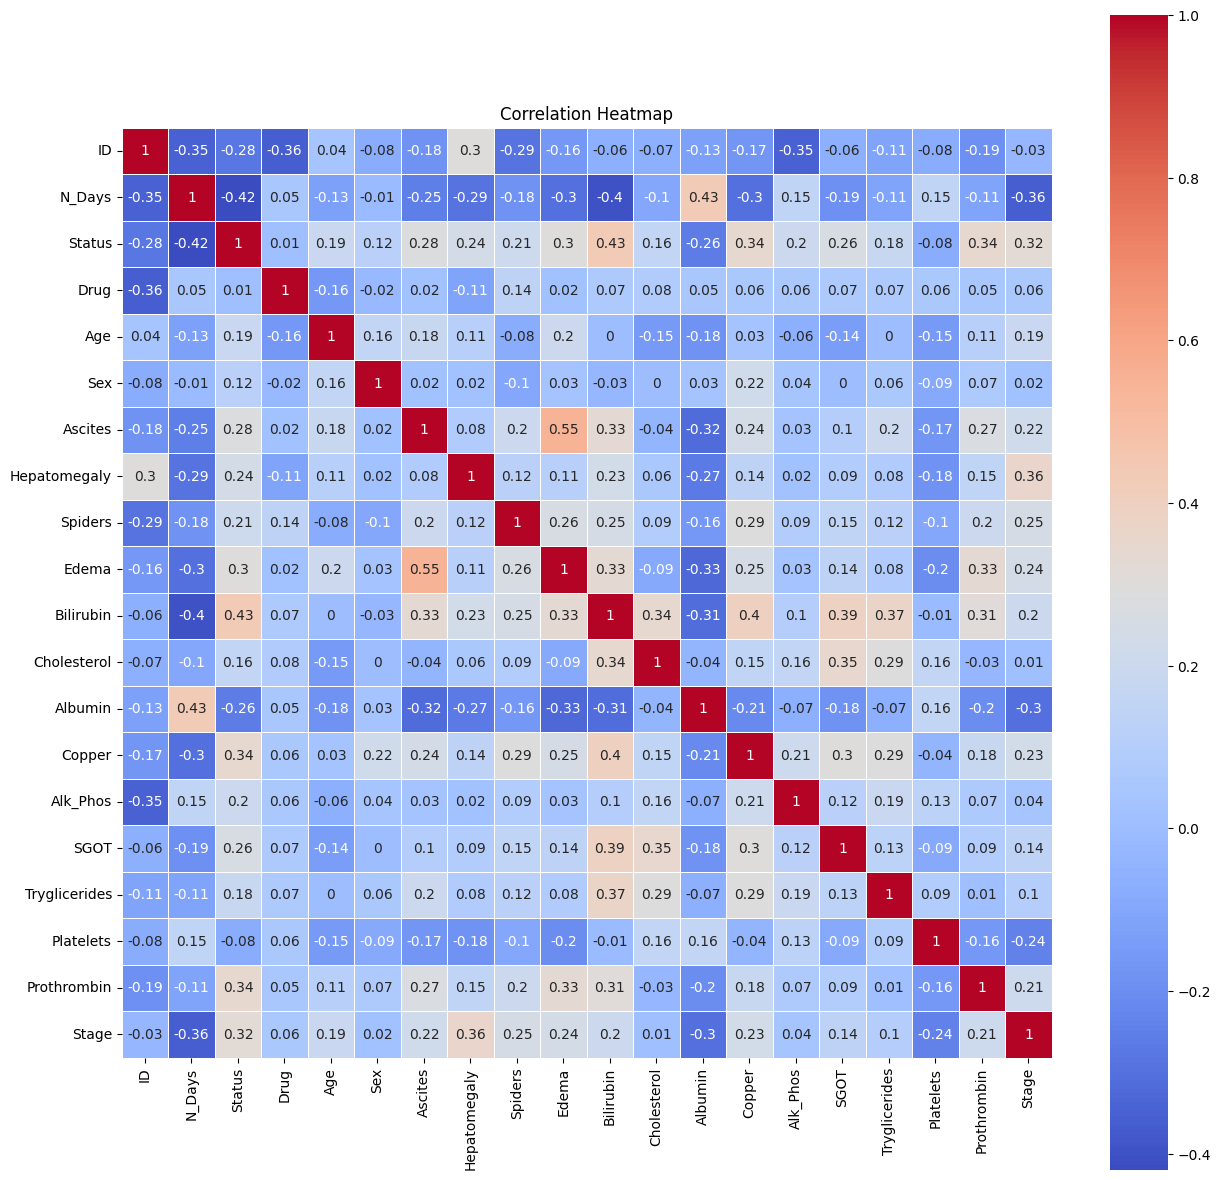

In [33]:

# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_df = df.select_dtypes(include=[np.number])

# Hitung korelasi hanya untuk kolom numerik
correlation = numerical_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(correlation.round(2),
            annot=True,
            cmap='coolwarm',
            square=True,
            linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### penghapusan fitur yang bernilai konstan

In [34]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [35]:
df

ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0      1     400     2.0   0.0  21464  0.0      1.0           1.0      1.0   
1      2    4500     0.0   0.0  20617  0.0      0.0           1.0      1.0   
2      3    1012     2.0   0.0  25594  1.0      0.0           0.0      0.0   
3      4    1925     2.0   0.0  19994  0.0      0.0           1.0      1.0   
4      5    1504     1.0   1.0  13918  0.0      0.0           1.0      1.0   
..   ...     ...     ...   ...    ...  ...      ...           ...      ...   
413  414     681     2.0   0.0  24472  0.0      0.0           1.0      0.0   
414  415    1103     0.0   0.0  14245  0.0      0.0           1.0      0.0   
415  416    1055     0.0   0.0  20819  0.0      0.0           1.0      0.0   
416  417     691     0.0   0.0  21185  0.0      0.0           1.0      0.0   
417  418     976     0.0   0.0  19358  0.0      0.0           1.0      0.0   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      2.0       14.5        261.0     2.60   156.0    1718.0  137.95   
1      0.0        1.1        302.0     4.14    54.0    7394.8  113.52   
2      1.0        1.4        176.0     3.48   210.0     516.0   96.10   
3      1.0        1.8        244.0     2.54    64.0    6121.8   60.63   
4      0.0        3.4        279.0     3.53   143.0     671.0  113.15   
..     ...        ...          ...      ...     ...       ...     ...   
413    0.0        1.2        309.5     2.96    73.0    1259.0  114.70   
414    0.0        0.9        309.5     3.83    73.0    1259.0  114.70   
415    0.0        1.6        309.5     3.42    73.0    1259.0  114.70   
416    0.0        0.8        309.5     3.75    73.0    1259.0  114.70   
417    0.0        0.7        309.5     3.29    73.0    1259.0  114.70   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413          108.0      174.0         10.9    3.0  
414          108.0      180.0         11.2    4.0  
415          108.0      143.0          9.9    3.0  
416          108.0      269.0         10.4    3.0  
417          108.0      350.0         10.6    4.0  

[418 rows x 20 columns]

### penghapusan fitur berkorelasi tinggi

In [36]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
data_tanpa_fitur = df.drop('Status', axis=1)

In [38]:
# Memilih hanya kolom numerik dari data_tanpa_fitur
numerical_data = data_tanpa_fitur.select_dtypes(include=[np.number])

# Menghitung korelasi untuk kolom numerik dengan threshold 0.8
correlation_matrix = numerical_data.corr().abs()  # Matriks korelasi absolut
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Menentukan fitur yang berkorelasi tinggi
corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print('Jumlah fitur yang berkorelasi tinggi:', len(set(corr_features)))
print('Fitur berkorelasi tinggi:', corr_features)


Jumlah fitur yang berkorelasi tinggi: 0
Fitur berkorelasi tinggi: []


In [39]:
# removed correlated  features
df.drop(labels=corr_features, axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    float64
 3   Drug           418 non-null    float64
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    float64
 6   Ascites        418 non-null    float64
 7   Hepatomegaly   418 non-null    float64
 8   Spiders        418 non-null    float64
 9   Edema          418 non-null    float64
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [41]:
df.describe()

ID       N_Days      Status        Drug           Age  \
count  418.000000   418.000000  418.000000  418.000000    418.000000   
mean   209.500000  1917.782297    0.830144    0.368421  18533.351675   
std    120.810458  1104.672992    0.955785    0.482954   3815.845055   
min      1.000000    41.000000    0.000000    0.000000   9598.000000   
25%    105.250000  1092.750000    0.000000    0.000000  15644.500000   
50%    209.500000  1730.000000    0.000000    0.000000  18628.000000   
75%    313.750000  2613.500000    2.000000    1.000000  21272.500000   
max    418.000000  4795.000000    2.000000    1.000000  28650.000000   

              Sex     Ascites  Hepatomegaly     Spiders       Edema  \
count  418.000000  418.000000    418.000000  418.000000  418.000000   
mean     0.105263    0.057416      0.636364    0.215311    0.200957   
std      0.307260    0.232915      0.481622    0.411530    0.506835   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      0.000000    0.000000      0.000000    0.000000    0.000000   
50%      0.000000    0.000000      1.000000    0.000000    0.000000   
75%      0.000000    0.000000      1.000000    0.000000    0.000000   
max      1.000000    1.000000      1.000000    1.000000    2.000000   

        Bilirubin  Cholesterol     Albumin      Copper      Alk_Phos  \
count  418.000000   418.000000  418.000000  418.000000    418.000000   
mean     3.220813   350.272727    3.497440   91.279904   1799.144976   
std      4.407506   193.123893    0.424972   74.485481   1875.121982   
min      0.300000   120.000000    1.960000    4.000000    289.000000   
25%      0.800000   273.000000    3.242500   51.250000   1016.250000   
50%      1.400000   309.500000    3.530000   73.000000   1259.000000   
75%      3.400000   347.750000    3.770000  100.750000   1707.750000   
max     28.000000  1775.000000    4.640000  588.000000  13862.400000   

             SGOT  Tryglicerides   Platelets  Prothrombin       Stage  
count  418.000000     418.000000  418.000000   418.000000  418.000000  
mean   120.564067     119.267943  256.866029    10.731100    3.023923  
std     49.085094      54.050691   97.024861     1.019587    0.875678  
min     26.350000      33.000000   62.000000     9.000000    1.000000  
25%     91.000000      95.000000  190.000000    10.000000    2.000000  
50%    114.700000     108.000000  251.000000    10.600000    3.000000  
75%    135.750000     127.750000  315.500000    11.100000    4.000000  
max    457.250000     598.000000  721.000000    18.000000    4.000000

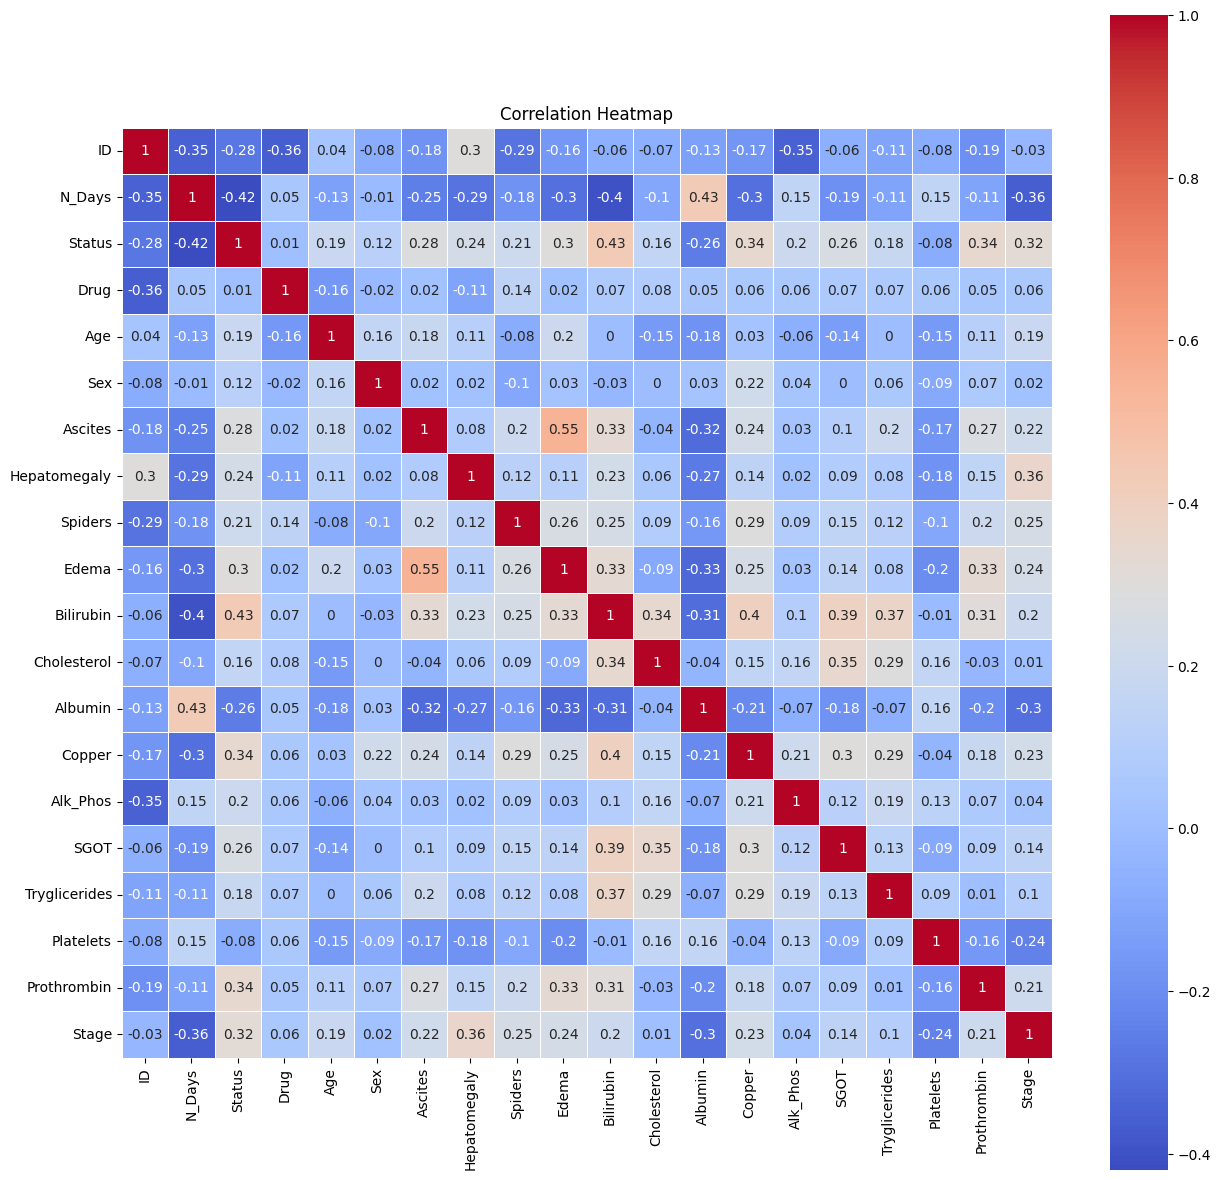

In [42]:

# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_df = df.select_dtypes(include=[np.number])

# Hitung korelasi untuk kolom numerik
correlation = numerical_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(correlation.round(2), annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Unit 7: J.62DMI00.013.1 - Membangun Model

### persiapan data

In [43]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop(['Status'], axis=1)
y = df['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


### membangun decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [45]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.5952380952380952
Precision: 0.5952380952380952
Recall: 0.5952380952380952

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68        23
         1.0       0.00      0.00      0.00         3
         2.0       0.53      0.62      0.57        16

    accuracy                           0.60        42
   macro avg       0.41      0.43      0.42        42
weighted avg       0.59      0.60      0.59        42



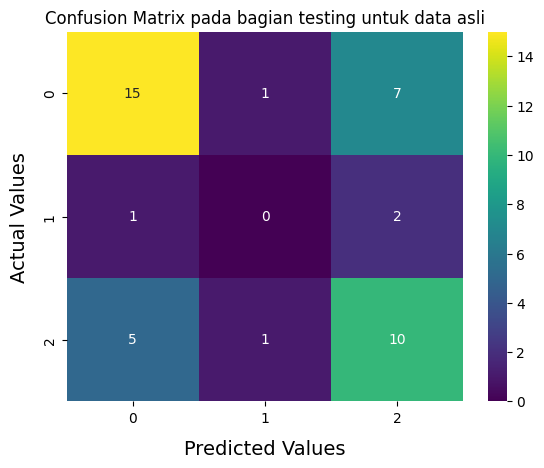

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### feature importance

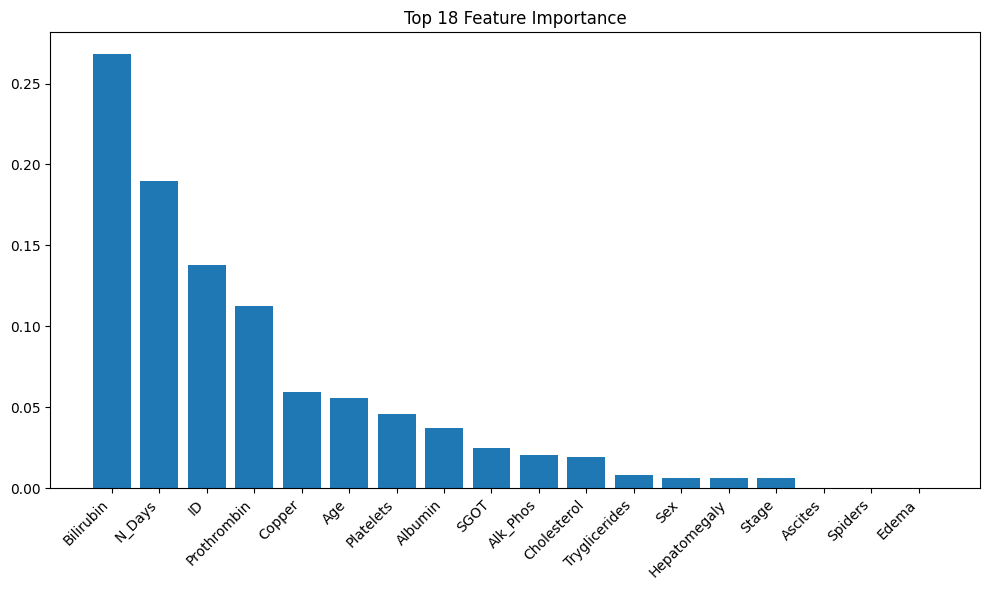

In [47]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.758074074074074


In [49]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.7857142857142857
Precision: 0.7857142857142857
Recall: 0.7857142857142857

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86        23
         1.0       0.00      0.00      0.00         3
         2.0       0.79      0.69      0.73        16

    accuracy                           0.79        42
   macro avg       0.52      0.55      0.53        42
weighted avg       0.73      0.79      0.75        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


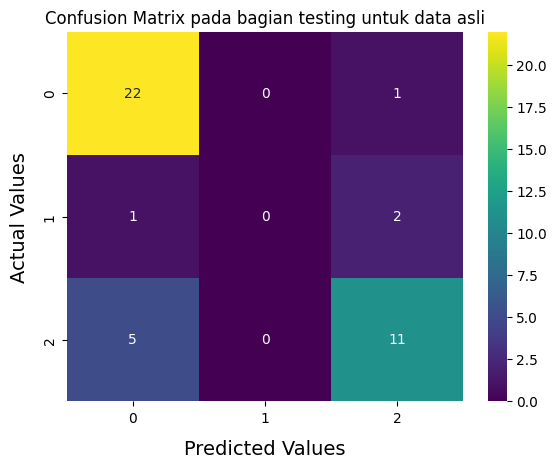

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

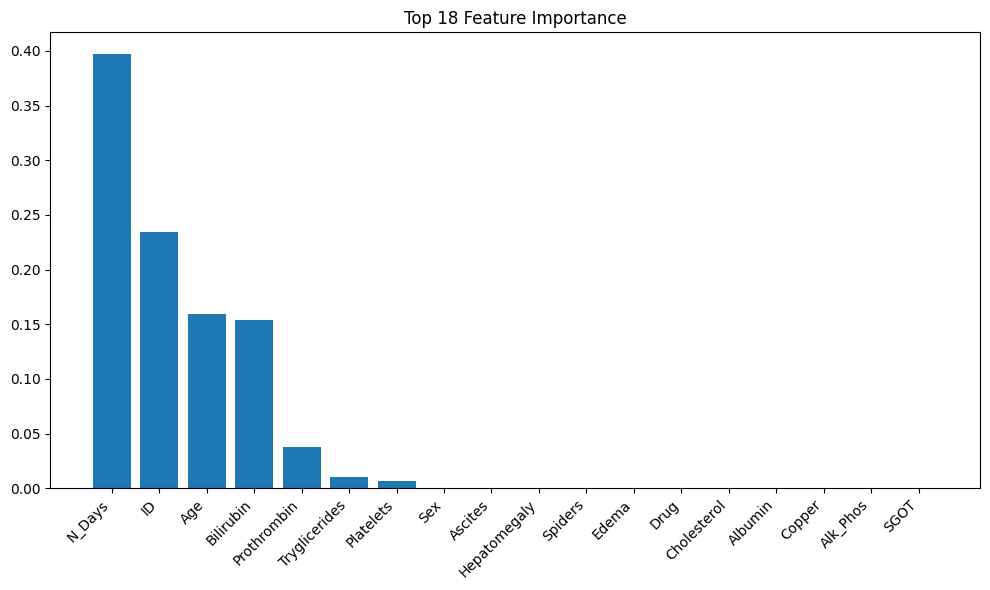

In [51]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### simpan model terbaik

In [52]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_cirrhosis_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_cirrhosis_predictor_model.joblib'")


Model terbaik telah disimpan sebagai 'best_cirrhosis_predictor_model.joblib'


### cek underfitting dan overfitting

In [53]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8643617021276596
Testing Accuracy: 0.7857142857142857


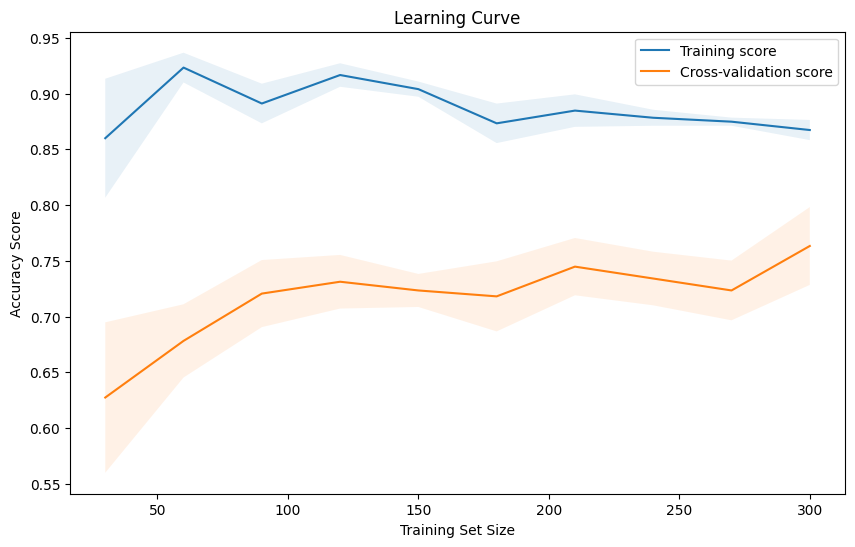

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

## visualisasi decision tree

### visualisasi decision tree umum

In [55]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai 'cirrhosis_decision_tree_visualization.png'


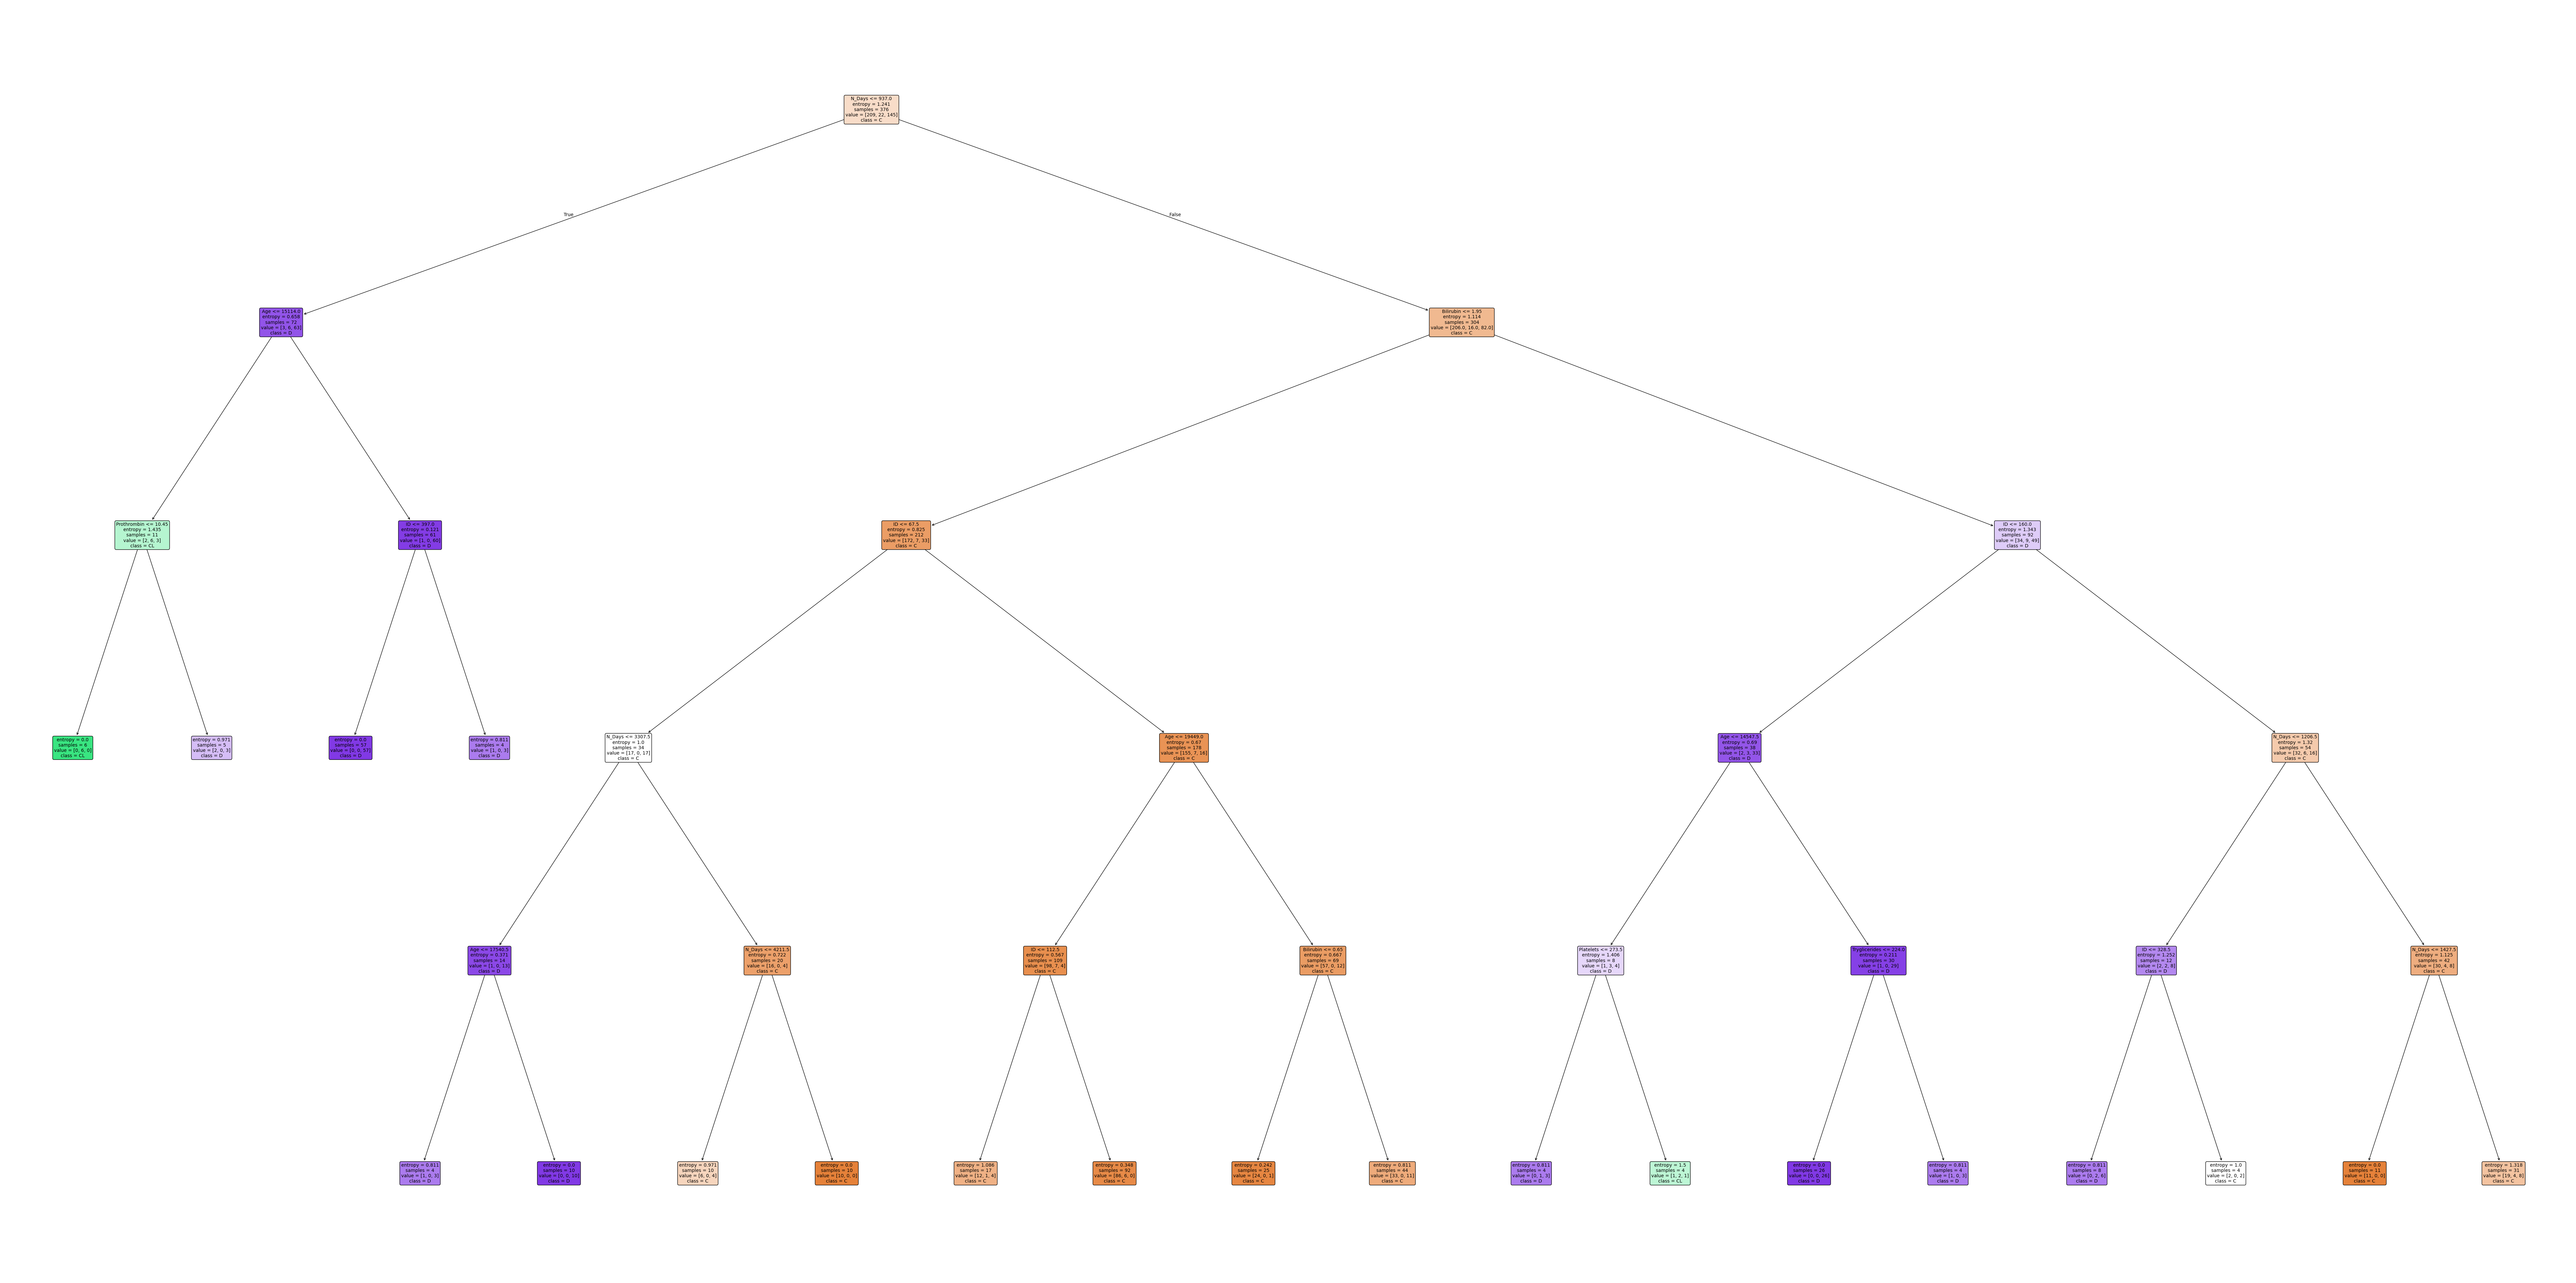

In [56]:
import matplotlib.pyplot as plt

# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['C', 'CL', 'D'],  # Gantilah dengan nama kelas yang sesuai
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/cirrhosis_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'cirrhosis_decision_tree_visualization.png'")


### visualisasi tree terbaik

Gambar pohon keputusan telah disimpan sebagai 'cirrhosis_best_decision_tree_visualization.png'


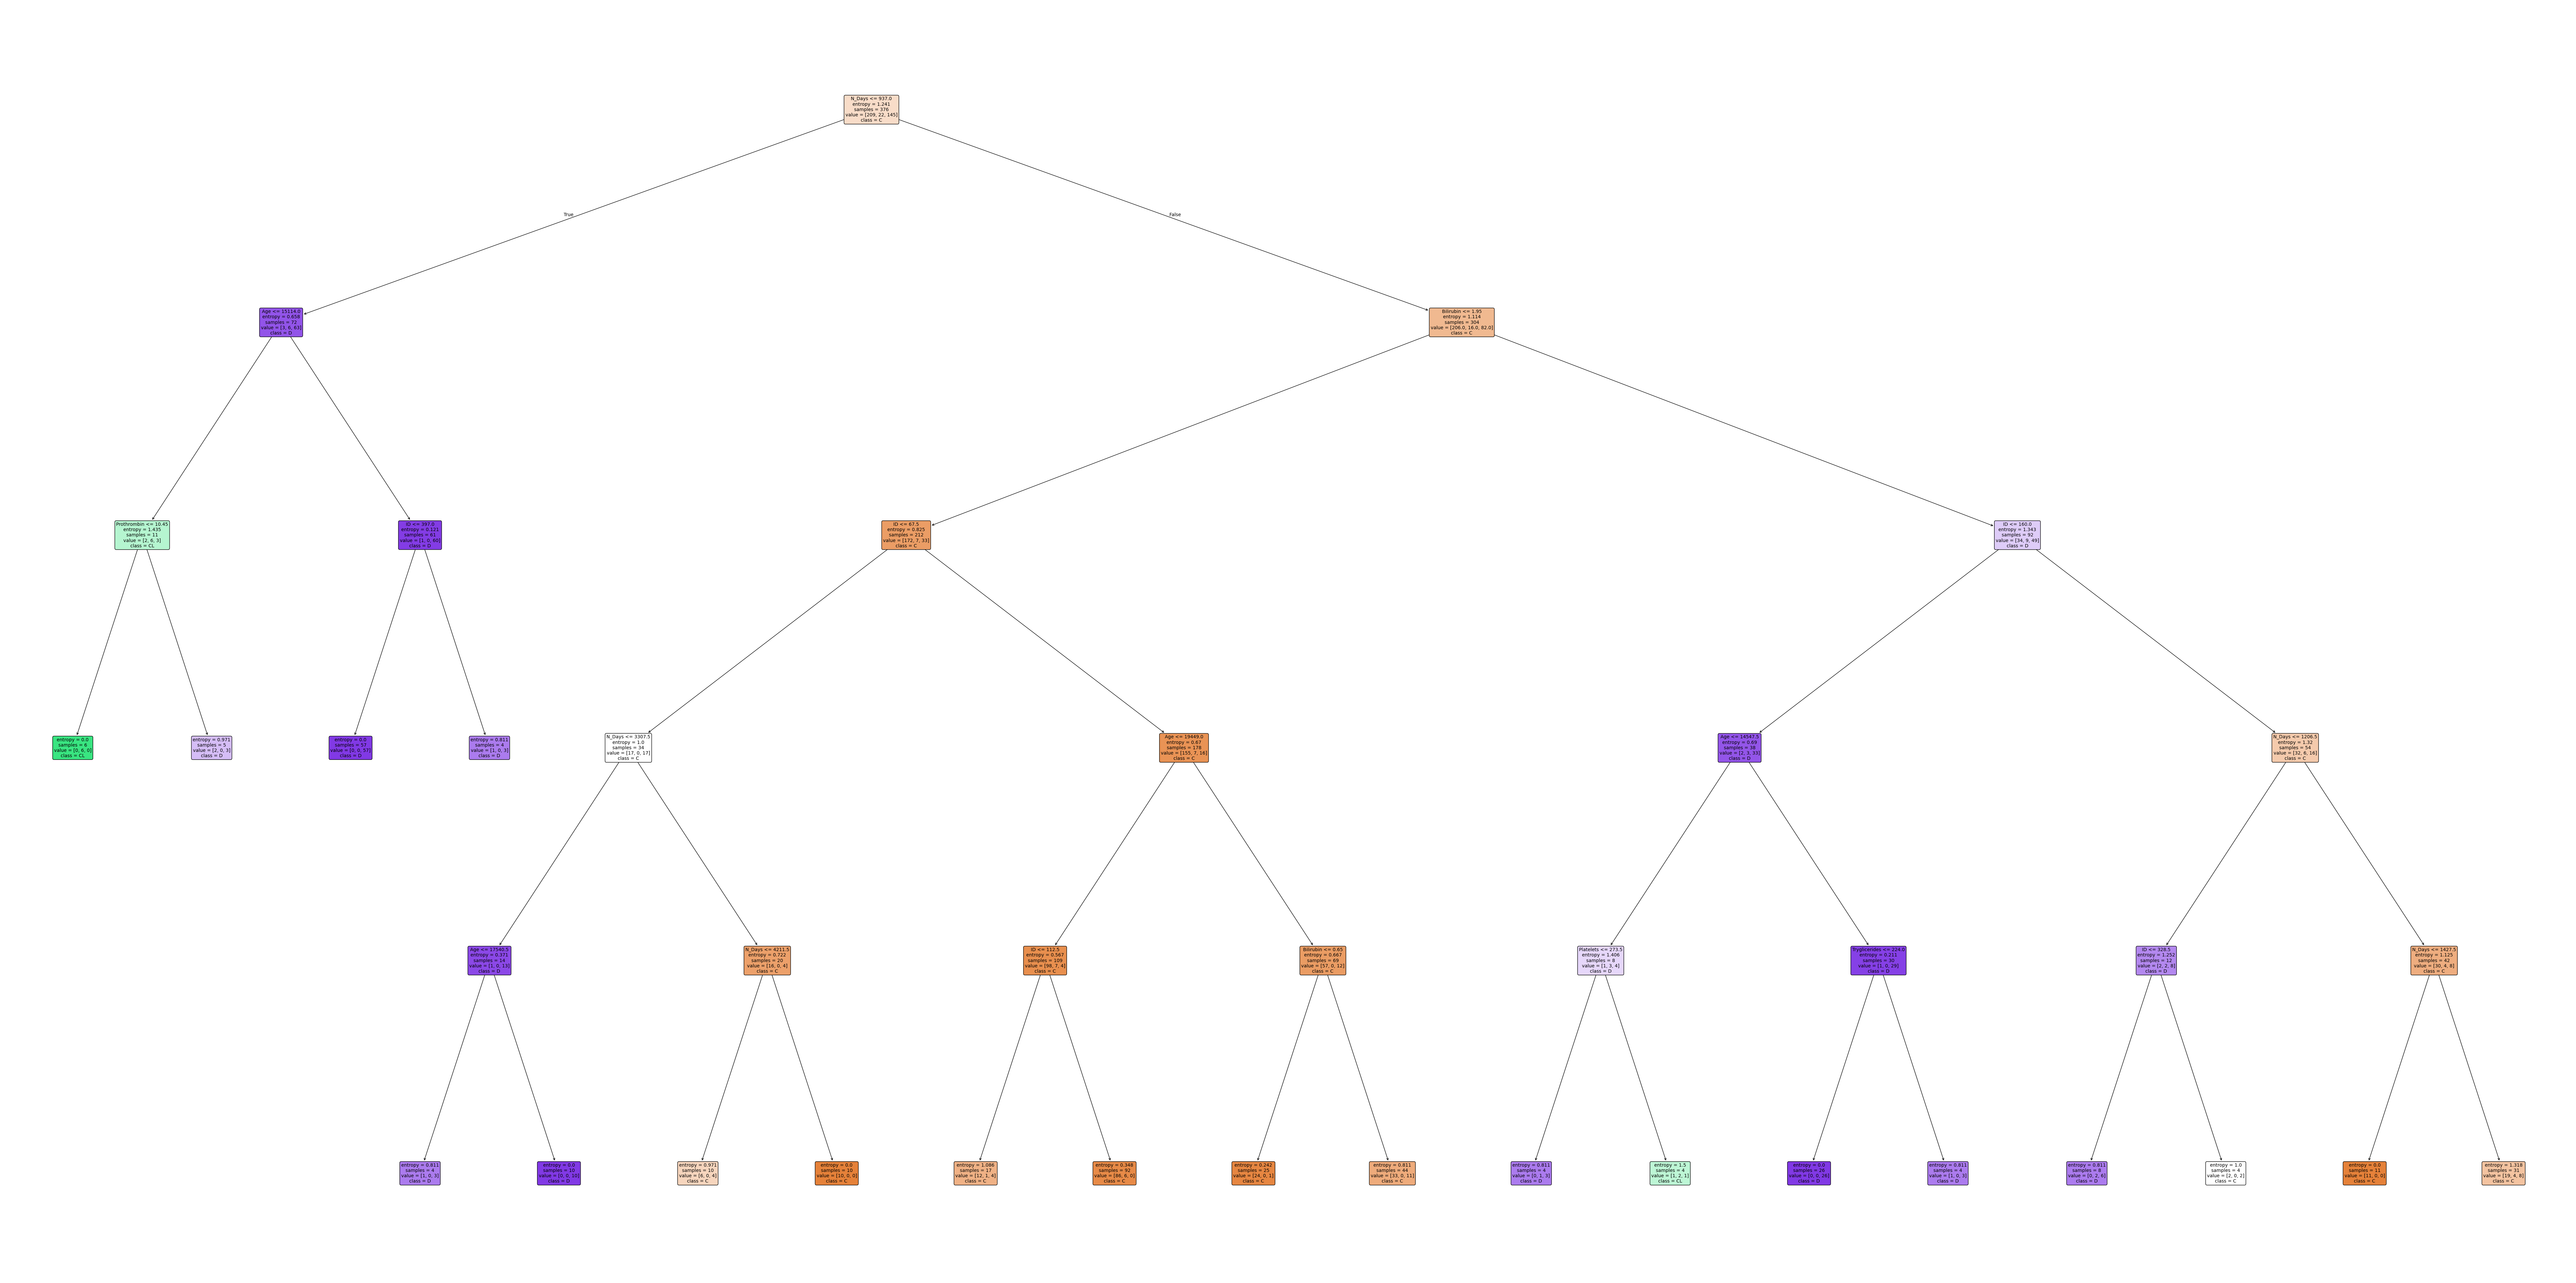

In [57]:

# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['C', 'CL', 'D'],  # Sesuaikan nama kelas
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/cirrhosis_best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'cirrhosis_best_decision_tree_visualization.png'")
